# House Prices: Advanced Regression Techniques

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

This kaggle challenge consist on a regression problem, predicting house prices, based on 79 distinct features.

I will mostly use it to train data-preprocessing and feature engineering, as well as regression models, without taking overall Kaggle score too much into consideration.

__Please note: this Notebook is a work in progress and is still being updated.__

### Import libraries

First let's import the libraries that will be used in this notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.display.max_columns = None

#Add separation lines in graphs
plt.rcParams["patch.force_edgecolor"] = True

#SciPy
from scipy import stats, spatial

#Sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression, LassoCV, Lasso, ElasticNet
from sklearn.model_selection import train_test_split,KFold,cross_val_score, learning_curve,GridSearchCV
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.neighbors import LocalOutlierFactor
import xgboost
import lightgbm as lgbm

from sklearn.metrics import mean_squared_error

### EDA

Let's start by doing some Exploratory Data Analysis and learn more about the Dataset itself.

This Dataset is divided into two, a Train set (houses with the Target Variable, SalePrice) and a Test Set (houses with no SalePrice, the target variable).

In [2]:
#Import train and test sets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

From .info we can already see that train and test sets have many missing values! These need to be filled.

__Let's list the features with missing values and sort them from most to least in %:__

In [6]:
#List and store features with Missing Values of the Train set in a new variable for latter use.
mva_train = train.isnull().mean()
mva_train[mva_train > 0].sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

In [7]:
#List and store features with Missing Values of the Test set in a new variable for latter use.
mva_test = test.isnull().mean()
mva_test[mva_test > 0].sort_values(ascending=False)

PoolQC          0.997944
MiscFeature     0.965045
Alley           0.926662
Fence           0.801234
FireplaceQu     0.500343
LotFrontage     0.155586
GarageYrBlt     0.053461
GarageCond      0.053461
GarageQual      0.053461
GarageFinish    0.053461
GarageType      0.052090
BsmtCond        0.030843
BsmtExposure    0.030158
BsmtQual        0.030158
BsmtFinType1    0.028787
BsmtFinType2    0.028787
MasVnrType      0.010966
MasVnrArea      0.010281
MSZoning        0.002742
BsmtFullBath    0.001371
BsmtHalfBath    0.001371
Utilities       0.001371
Functional      0.001371
Exterior2nd     0.000685
Exterior1st     0.000685
SaleType        0.000685
BsmtFinSF1      0.000685
BsmtFinSF2      0.000685
BsmtUnfSF       0.000685
KitchenQual     0.000685
GarageCars      0.000685
GarageArea      0.000685
TotalBsmtSF     0.000685
dtype: float64

There seem to be many missing values in both the train and test sets, particularly in:
- Lot Frontage (17.7% MV on train set / 15.6% MV on test set);
- __Alley__ (93.7% MV on train set / 92,7% MV on test set);
- FireplaceQu (47.3% MV on train set / 50.0% mv on test set);
- __PoolQC__ (99.5% MV on train set / 99.8% MV on test set) - This will be dropped;
- __Fence__ (80.8% MV on train set / 80.1% MV on test set);
- __MiscFeature__ (96.3% MV on train set / 96.5% MV on test set).

### SalePrice distribution

SalePrice is the target variable of this problem and as such it is highly important. 

Unlike classification, in regression we are predicting a continuous number. Hence, the prediction could be any number along the real number line.
Therefore, it is always useful to check the distribution of the target variable, and indeed all numeric variables, when building a regression model. Machine Learning algorithms work really well with features that are normally distributed, a distribution that is symmetric and has a characteristic bell shape. If features are not normally distributed, they can be transformed using statistical methods.

Let's check the SalePrice distribution and also the corresponding QQ plot.

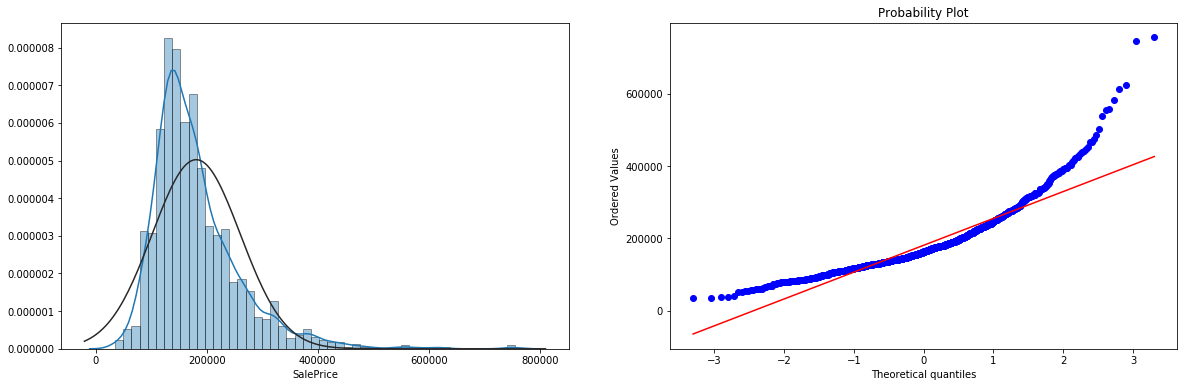

In [8]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(train['SalePrice'], fit=stats.norm);
plt.subplot(1,2,2)
_=stats.probplot(train['SalePrice'], plot=plt)

Most houses were sold with prices between 100.000 and 200.000 dollars.

The distribution seems to be right skewed. But by how much?

In [9]:
#What is the skewedness of SalePrice?
print('The skewedness of SalePrice is: {:0.3f}'.format(train['SalePrice'].skew()))

The skewedness of SalePrice is: 1.883


This is a considerably skewed distribution and normalisation may help in latter stages, when training the models. Thefore let's log transform the feature!

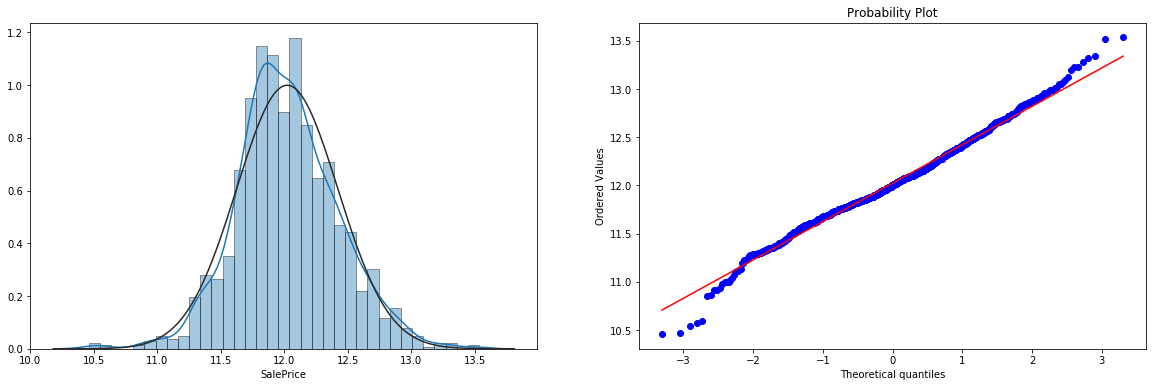

In [10]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.distplot(np.log1p(train['SalePrice']), fit=stats.norm);
plt.subplot(1,2,2)
_=stats.probplot(np.log1p(train['SalePrice']), plot=plt)

The log transformation seems to better approximate a normal distribution! What's the resulting skewedness?

In [11]:
#What is the skewedness of SalePrice?
print('The skewedness of SalePrice is: {:0.3f}'.format(np.log1p(train['SalePrice'].skew())))

The skewedness of SalePrice is: 1.059


Skewedness has reduced considerably and is now close to 1. Let's overwrite this in 'SalePrice'.

In [12]:
train['SalePrice'] = np.log1p(train['SalePrice'])

We will now explore the various features via plots.

__Let's create lists with categorical and quantitative attributes for future plotting__

In [13]:
categorical = [i for i in train.columns if train.dtypes[i] == 'object']
len(categorical)

43

In [14]:
quantitative = [i for i in train.drop(['Id','SalePrice'],axis=1).columns if train.dtypes[i] != 'object']

### Quantitative Features

Let's start with the 1uantitative features of the dataset.

In [15]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%       0.000000      2.000000      1.000000      5.000000     0.000000   
50%       0.000000      3.000000      1.000000      6.000000     1.000000   
75%       1.000000      3.000000      1.000000      7.000000     1.000000   
max       2.000000      8.000000      3.000000     14.000000     3.000000   

       GarageYrBlt   GarageCars   GarageArea   WoodDeckSF  OpenPorchSF  \
count  1379.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean   1978.506164     1.767123   472.980137    94.244521    46.660274   
std      24.689725     0.747315   213.804841   125.338794    66.256028   
min    1900.000000     0.000000     0.000000     0.000000     0.000000   
25%    1961.000000     1.000000   334.500000     0.000000     0.000000   
50%    1980.000000     2.000000   480.000000     0.000000    25.000000   
75%    2002.000000     2.000000   576.000000   168.000000    68.000000   
max    2

One important metric is correlation, between features but also to the target variable. 

Let's start by checking correlation to the target variable in graphical and form.

In [16]:
feat_corr = train.drop('Id',axis=1).corr().drop('SalePrice',axis=0)

In [17]:
corr_sale_price = feat_corr['SalePrice'].sort_values(ascending=True)

Text(0.5, 0, 'Correlation with SalePrice')

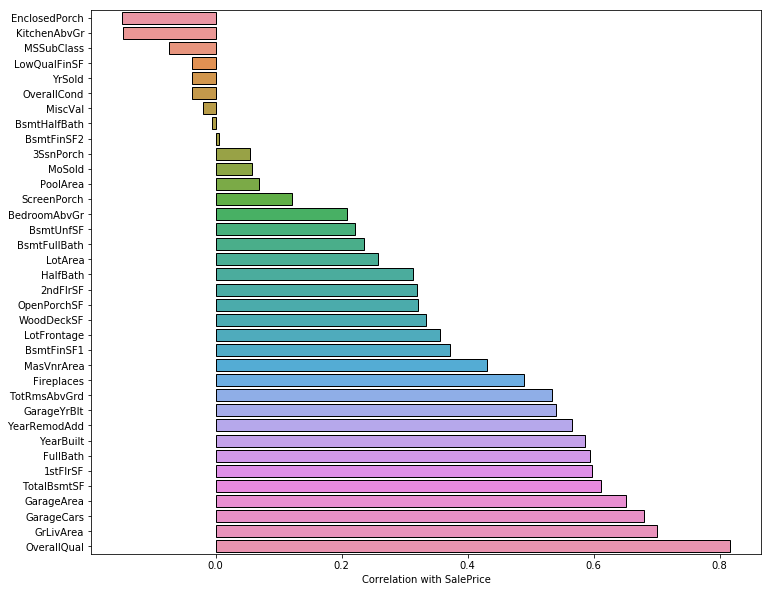

In [18]:
plt.figure(figsize=(12,10))
sns.barplot(y=corr_sale_price.index,x=corr_sale_price,orient='horizontal')
plt.xlabel('Correlation with SalePrice')

We can see that some features are hugely correlated with SalePrice and make real world sense, namely Overall Quality of the house, living area above ground, garage size and basement size. 

We can also see some features which are negatively correlated with SalePrice.

Let's also create a heatmap of all features!

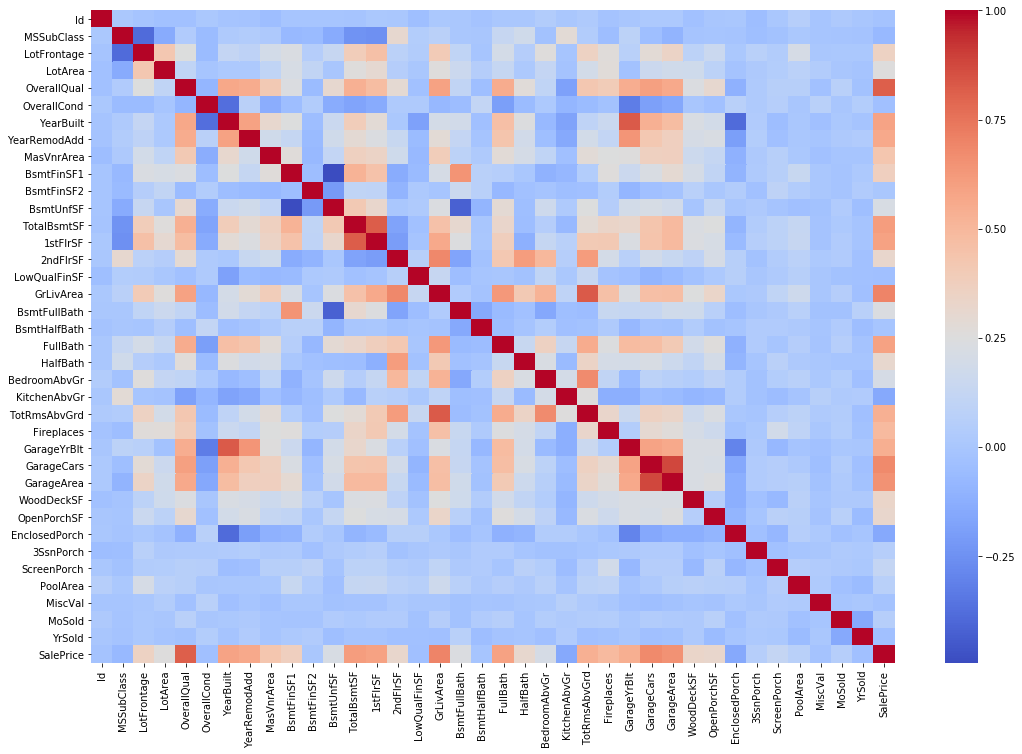

In [19]:
plt.figure(figsize=(18,12))
sns.heatmap(train.corr(),cmap='coolwarm')

__Let's print the distribution plots for the continuous variables__

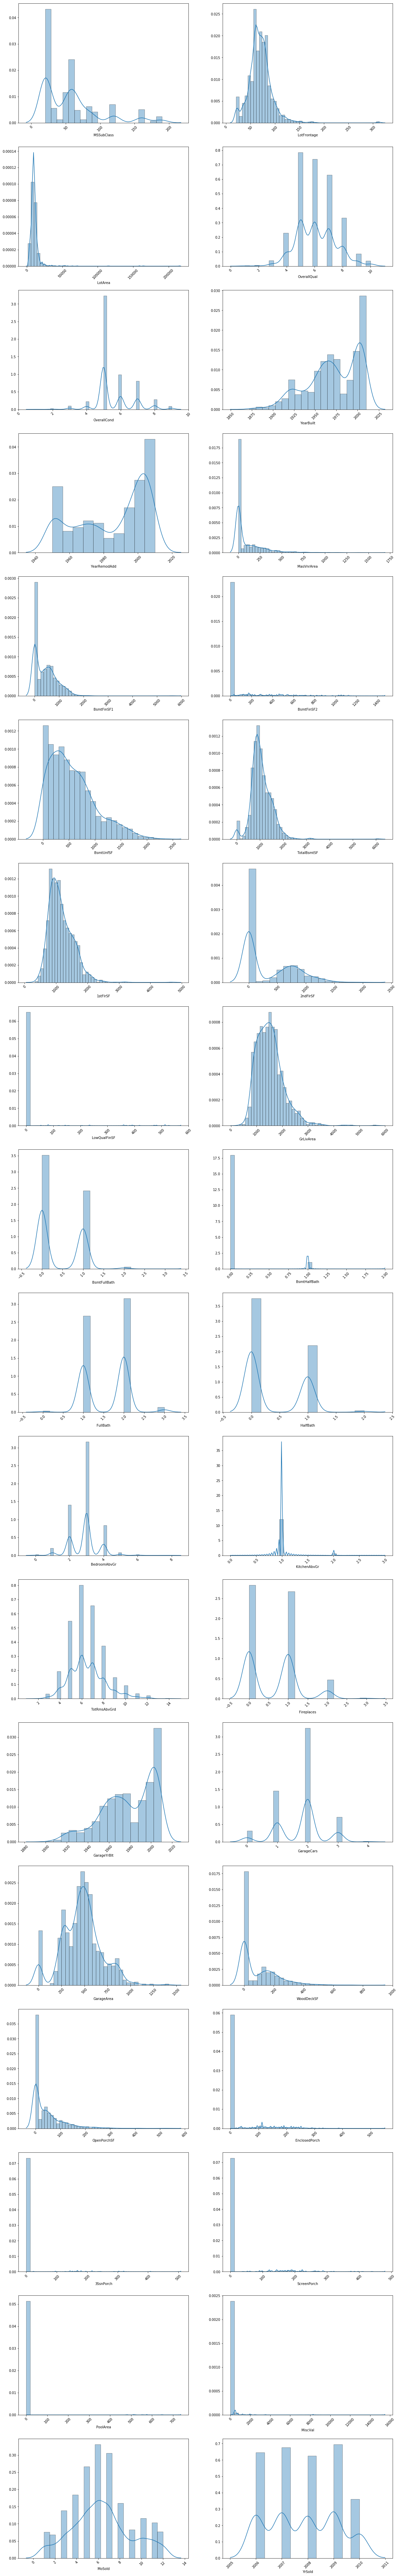

In [20]:
#Determine the number of rows and set a variable for it
n_cats = len(quantitative)

if n_cats % 2 == 0: #If n_rows is even, divide by 2
    n_rows = int(n_cats/2)
else: #If n_rows is odd, divide by 2 and add an additonal row
    n_rows = int(n_cats/2)+1

#Set subplots
fig, axs = plt.subplots(nrows = n_rows, ncols=2,figsize=(20,140))

# axes are in a two-dimensional array, indexed by [row, col]
k=0
for i in range(n_rows):
    for j in range(2):
        ax = sns.distplot(train[quantitative[k]].dropna(),ax=axs[i,j])
        #Rotate ticks 45º for better readability
        plt.setp(ax.get_xticklabels(), rotation=45)
        k+=1
        if k >= n_cats:
            break

__What about the variation of SalePrice with each numerical attribute?__

We'll plot regression plots of attributes with SalePrice

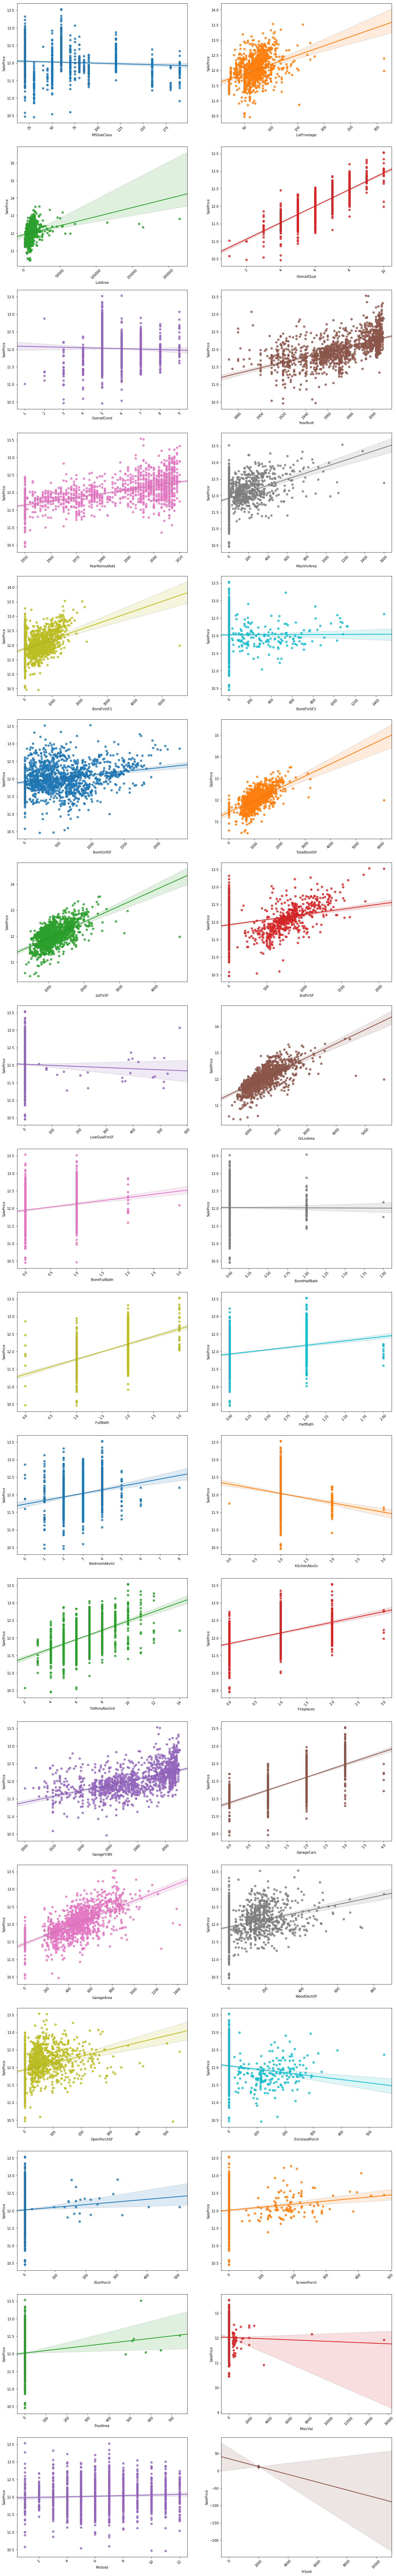

In [21]:
#Determine the number of rows and set a variable for it
n_cats = len(quantitative)

if n_cats % 2 == 0: #If n_rows is even, divide by 2
    n_rows = int(n_cats/2)
else: #If n_rows is odd, divide by 2 and add an additonal row
    n_rows = int(n_cats/2)+1

#Set subplots
fig, axs = plt.subplots(nrows = n_rows, ncols=2,figsize=(20,140))

# axes are in a two-dimensional array, indexed by [row, col]
k=0
for i in range(n_rows):
    for j in range(2):
        ax = sns.regplot(x=train[quantitative[k]],y=train['SalePrice'],ax=axs[i,j])
        #Rotate ticks 45º for better readability
        plt.setp(ax.get_xticklabels(), rotation=45)
        k+=1
        if k >= n_cats:
            break

We can already see that we have many features that are discrete rather than continuous, as well as features that are ordinal in nature, rather than numerical.

### Categorical Values

Now, let's explore categorical values!

__Let's print boxplots for all categorical attributes__

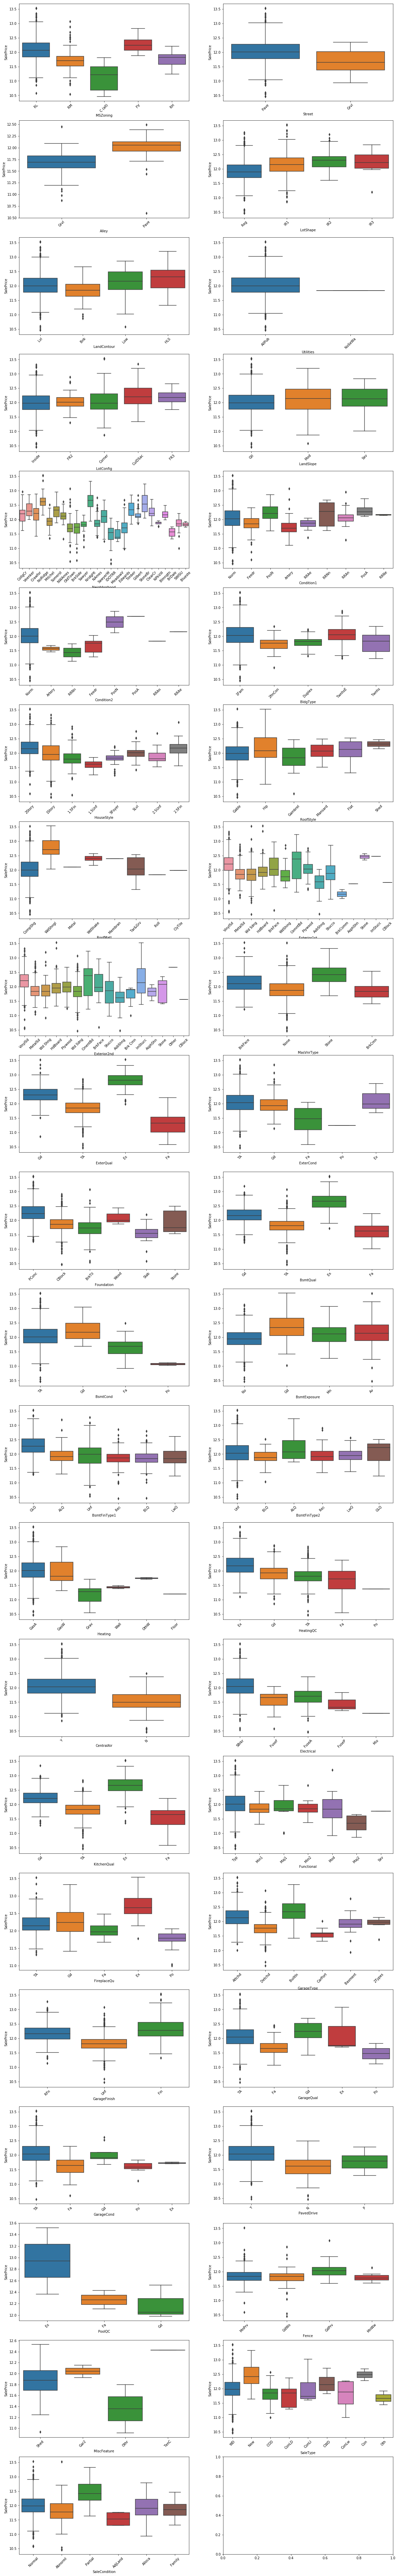

In [22]:
#Determine the number of rows and set a variable for it
n_cats = len(categorical)

if n_cats % 2 == 0: #If n_rows is even, divide by 2
    n_rows = int(n_cats/2)
else: #If n_rows is odd, divide by 2 and add an additonal row
    n_rows = int(n_cats/2)+1

#Set subplots
fig, axs = plt.subplots(nrows = n_rows, ncols=2,figsize=(20,140))

# axes are in a two-dimensional array, indexed by [row, col]
k=0
for i in range(n_rows):
    for j in range(2):
        ax = sns.boxplot(x=train[categorical[k]],y=train['SalePrice'],data=train,ax=axs[i,j])
        #Rotate ticks 45º for better readability
        plt.setp(ax.get_xticklabels(), rotation=45)
        k+=1
        if k >= n_cats:
            break

## Data Cleaning

While only a brief exploration of the data was performed, it already gives us some insights!

Let's continue, by cleaning the data, starting with the null values that need to be filed. Before doing so and as a way of reducing duplication of operations, let's join the training and test sets.

To accelerate the cleaning process, let's join the train and test sets!

In [23]:
#Store the size of train set in a variable for later splitting using the ID attribute
train_size = len(train)
train_size

1460

In [24]:
combined = pd.concat([train,test],sort=False).reset_index(drop=True)

In [25]:
#What is the ratio of missing values per feature?
mv_combined = combined.isnull().mean()
mv_combined[mv_combined > 0].sort_values(ascending=False)

PoolQC          0.996574
MiscFeature     0.964029
Alley           0.932169
Fence           0.804385
SalePrice       0.499829
FireplaceQu     0.486468
LotFrontage     0.166495
GarageYrBlt     0.054471
GarageFinish    0.054471
GarageQual      0.054471
GarageCond      0.054471
GarageType      0.053786
BsmtCond        0.028092
BsmtExposure    0.028092
BsmtQual        0.027749
BsmtFinType2    0.027407
BsmtFinType1    0.027064
MasVnrType      0.008222
MasVnrArea      0.007879
MSZoning        0.001370
BsmtFullBath    0.000685
BsmtHalfBath    0.000685
Functional      0.000685
Utilities       0.000685
BsmtFinSF2      0.000343
BsmtUnfSF       0.000343
BsmtFinSF1      0.000343
TotalBsmtSF     0.000343
SaleType        0.000343
KitchenQual     0.000343
Exterior2nd     0.000343
Exterior1st     0.000343
GarageCars      0.000343
GarageArea      0.000343
Electrical      0.000343
dtype: float64

### Information on attributes

Data documentation explains that some features have missing values on elements some houses don't have! These can be set to a new category "None".

Features:

- PoolQC;
- MiscFeature;
- Alley;
- Fence;
- FireplaceQu;
- GarageType;
- GarageFinish;
- GarageQual;
- GarageCond;
- BsmtQual;
- BsmtCond;
- BsmtExposure;
- BsmtFinType1;
- BsmtFinType2;

Let's deal with these first!

In [26]:
#List of "None" features
list_nones = ['PoolQC', 'MiscFeature', 'Alley','Fence', 'FireplaceQu', 'GarageType',
               'GarageFinish','GarageQual','GarageCond','BsmtQual','BsmtCond','BsmtExposure',
               'BsmtFinType1','BsmtFinType2']

In [27]:
#Let's loop through the various features!
for i in list_nones:
    combined[i].fillna('None',inplace=True)

In [28]:
#Check missing values
mv_combined = combined.isnull().mean()
mv_combined[mv_combined > 0].sort_values(ascending=False)

SalePrice       0.499829
LotFrontage     0.166495
GarageYrBlt     0.054471
MasVnrType      0.008222
MasVnrArea      0.007879
MSZoning        0.001370
BsmtHalfBath    0.000685
BsmtFullBath    0.000685
Functional      0.000685
Utilities       0.000685
KitchenQual     0.000343
Electrical      0.000343
SaleType        0.000343
BsmtUnfSF       0.000343
BsmtFinSF2      0.000343
BsmtFinSF1      0.000343
GarageCars      0.000343
Exterior2nd     0.000343
Exterior1st     0.000343
GarageArea      0.000343
TotalBsmtSF     0.000343
dtype: float64

This was already hugely helpful! 

Data documentation has additional useful information, as features that we filled previously have numerical counterparts with missing values instead of 0 values (house does not have the feature).

These features are:
- GarageYrBlt;
- MasVnrArea;
- BsmtUnfSF;
- BsmtFinSF1;
- BsmtFinSF2;
- TotalBsmtSF;
- BsmtFullBath;
- BsmtHalfBath;
- GarageCars;
- GarageArea.

In [29]:
list_zeros = ['GarageYrBlt','MasVnrArea','BsmtUnfSF','BsmtFinSF1','BsmtFinSF2',
              'TotalBsmtSF','BsmtFullBath','BsmtHalfBath','GarageCars','GarageArea']

In [30]:
#Let's loop through the various features and set zeros!
for i in list_zeros:
    combined[i].fillna(0,inplace=True)

In [31]:
#Check missing values
mv_combined = combined.isnull().mean()
mv_combined[mv_combined > 0].sort_values(ascending=False)

SalePrice      0.499829
LotFrontage    0.166495
MasVnrType     0.008222
MSZoning       0.001370
Functional     0.000685
Utilities      0.000685
SaleType       0.000343
KitchenQual    0.000343
Electrical     0.000343
Exterior2nd    0.000343
Exterior1st    0.000343
dtype: float64

The remaining missing values will need to be dealt with! Let's start with LotFrontage.

There is a feature called LotArea. Most houses are built in square or rectangular plots. Let's see if there is a good correlation between these variables.

C:\Users\migue\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


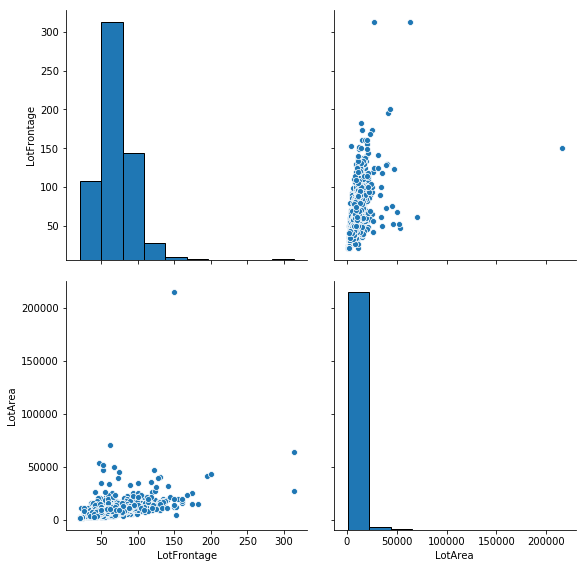

In [32]:
sns.pairplot(data=combined[['LotFrontage','LotArea']].dropna(),size=4)

What's the correlation?

In [33]:
print('Correlation value: {:.3f}'.format(combined['LotFrontage'].corr(combined['LotArea'])))

Correlation value: 0.490


The correlation is not as high as we'd hope.

__We are however comparing a length with an area! If we perform a sqrt tranformation on LotArea__, how does the correlation change?

In [34]:
print('Correlation value: {:.3f}'.format(combined['LotFrontage'].corr(np.sqrt(combined['LotArea']))))

Correlation value: 0.648


Correlation has improved somewhat! For this we have assumed a square lot. Let's see how this dimension compares to LotFrontage

In [35]:
combined['Lot_dim'] = np.sqrt(combined['LotArea'])
combined[['LotFrontage','Lot_dim']].head()

LotFrontage     Lot_dim
0         65.0   91.923882
1         80.0   97.979590
2         68.0  106.066017
3         60.0   97.724101
4         84.0  119.415242

In [36]:
(combined['Lot_dim']/combined['LotFrontage']).describe()

count    2433.000000
mean        1.464006
std         0.385545
min         0.419423
25%         1.234909
50%         1.386750
75%         1.609314
max         4.921475
dtype: float64

In [37]:
#Sum of absolute of difference between features
abs(combined['Lot_dim']-combined['LotFrontage']).sum()

67487.23798291334

There is some difference visible between the LotFrontage and Lot_dim features. Specifically, it seems that Lot_dim is mostly larger than LotFrontage (apart from a very small % of houses). Can we scale this dimension to better fit LotFrontage, via the median value?

In [38]:
combined['Lot_dim'] = combined['Lot_dim']/((combined['Lot_dim']/combined['LotFrontage']).median())

In [39]:
(combined['Lot_dim']/combined['LotFrontage']).describe()

count    2433.000000
mean        1.055710
std         0.278020
min         0.302450
25%         0.890505
50%         1.000000
75%         1.160493
max         3.548926
dtype: float64

In [40]:
#Sum of absolute of difference between features
abs(combined['Lot_dim']-combined['LotFrontage']).sum()

28514.97312150352

Not only is the difference balanced around the median, but we can see that std as reduced significantly, from 0.385545 to 0.278020. This can be cross-checked with the absolute differences that reduced by around 50%, representing a vast improvement of similarity between the features LotFrontage and Lot_dim.

Let's use this adjusted feature to fill missing values of LotFrontage!

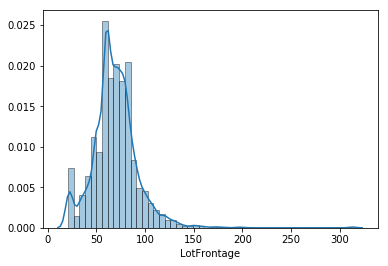

In [41]:
sns.distplot(a=combined['LotFrontage'].dropna())

In [42]:
#Fill in the missing values
filt = combined['LotFrontage'].isnull()

combined.loc[filt,'LotFrontage'] = combined[filt]['Lot_dim']

In [43]:
#Drop the auxiliary feature Lot_dim
combined.drop('Lot_dim',axis=1,inplace=True)

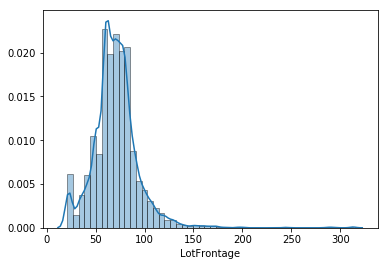

In [44]:
#Disttribution plot of LotFrontage after filling missing values
sns.distplot(a=combined['LotFrontage'])

Distribution does not seem to have changed shape due to the Missing Values that were filled which is a good sign!

In [45]:
#Check missing values
mv_combined = combined.isnull().mean()
mv_combined[mv_combined > 0].sort_values(ascending=False)

SalePrice      0.499829
MasVnrType     0.008222
MSZoning       0.001370
Functional     0.000685
Utilities      0.000685
SaleType       0.000343
KitchenQual    0.000343
Electrical     0.000343
Exterior2nd    0.000343
Exterior1st    0.000343
dtype: float64

__Remaining Features__

- MSZoning: Categorical;
- Functional: Categorical;
- Utilities: Categorical. Only has 2 features;
- SaleType: Categorical;
- KitchenQual: Categorical;
- Electrical: Categorical;
- Exterior2nd: Categorical;
- Exterior1st: Categorical;
- MasVnrType: Categorical;

Let's start with Utilities:

In [46]:
combined['Utilities'].unique()

array(['AllPub', 'NoSeWa', nan], dtype=object)

In [47]:
combined[combined['Utilities'] == 'NoSeWa']

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
944  945          20       RL    86.458082    14375   Pave  None      IR1   

    LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
944         Lvl    NoSeWa   CulDSac       Gtl       Timber       Norm   

    Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
944       Norm     1Fam       SLvl            6            6       1958   

     YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
944          1958     Gable  CompShg     HdBoard     HdBoard    BrkFace   

     MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
944       541.0        TA        TA     CBlock       TA       TA           No   

    BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
944          GLQ       111.0          Rec       354.0      354.0        819.0   

    Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
944    GasA        Gd          Y      FuseA      1344         0             0   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
944       1344           0.0           1.0         1         0             3   

     KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
944             1          Gd             7        Typ           1   

    FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
944          Gd    Basment       1958.0          RFn         2.0       525.0   

    GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
944         TA         TA          Y           0          118              0   

     3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  \
944          0          233         0   None  None        None        0   

     MoSold  YrSold SaleType SaleCondition  SalePrice  
944       1    2009      COD       Abnorml  11.831386

Utilities only has 2 categories and 1 of them only applies to 1 case! Let's drop the feature altogether.

In [48]:
combined.drop('Utilities',axis=1,inplace=True)

The remaining features have few Missing Values and will be filled with the mode.

In [49]:
#Create a list with the features that will be filled with the mode.
list_mode = ['MSZoning','Functional','SaleType','KitchenQual','Electrical','Exterior2nd','Exterior1st','MasVnrType']

for i in list_mode:
    combined[i].fillna(combined[i].mode()[0],inplace=True )   

In [50]:
#Check missing values
mv_combined = combined.isnull().mean()
mv_combined[mv_combined > 0].sort_values(ascending=False)

SalePrice    0.499829
dtype: float64

__All missing values are dealt with!__

### Dealing with Outliers

In the Ames Housing Dataset paper that acompanies this challenge, it is indicated that some Outliers can be identified and should be removed:

" Although all known errors were corrected in the data, no observations have been removed due to unusual values and all final residential sales from the initial data set are included in the data presented with this article. There are five observations that an instructor may wish to remove from the data set before giving it to students (a plot of SALE PRICE versus GR LIV AREA will quickly indicate these points). Three of them are true outliers (Partial Sales that likely don’t represent actual market values) and two of them are simply unusual sales (very large houses priced relatively appropriately). I would recommend removing any houses with more than 4000 square feet from the data set (which eliminates these five unusual observations) before assigning it to students. "

Let's proceed accordingly:

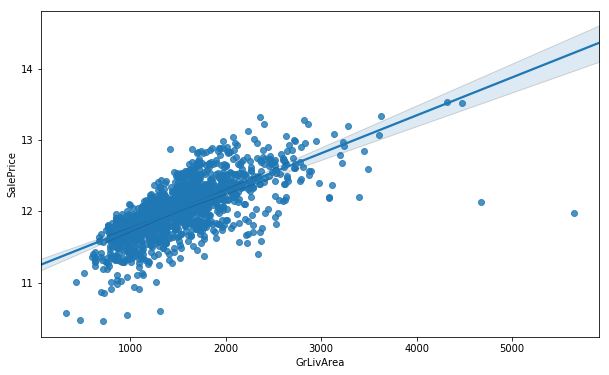

In [51]:
figure = plt.figure(figsize=(10,6))
sns.regplot(x='GrLivArea',y='SalePrice',data=combined)

2 Outliers are clearly visible on the middle right of the graph. The other must be one of the other two above 4000.

Let's proceed accodring to suggestion on Ames paper and remove all houses with more than 4000 of GrLivArea.

In [52]:
#Let's check houses with more than 4000 of GrLivArea
combined[(combined['GrLivArea']  > 4000) & (combined['Id'] <= 1460)].head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
523    524          60       RL        130.0    40094   Pave  None      IR1   
691    692          60       RL        104.0    21535   Pave  None      IR1   
1182  1183          60       RL        160.0    15623   Pave  None      IR1   
1298  1299          60       RL        313.0    63887   Pave  None      IR3   

     LandContour LotConfig LandSlope Neighborhood Condition1 Condition2  \
523          Bnk    Inside       Gtl      Edwards       PosN       PosN   
691          Lvl    Corner       Gtl      NoRidge       Norm       Norm   
1182         Lvl    Corner       Gtl      NoRidge       Norm       Norm   
1298         Bnk    Corner       Gtl      Edwards      Feedr       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
523      1Fam     2Story           10            5       2007          2008   
691      1Fam     2Story           10            6       1994          1995   
1182     1Fam     2Story           10            5       1996          1996   
1298     1Fam     2Story           10            5       2008          2008   

     RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
523        Hip  CompShg     CemntBd     CmentBd      Stone       762.0   
691      Gable  WdShngl     HdBoard     HdBoard    BrkFace      1170.0   
1182       Hip  CompShg     Wd Sdng     ImStucc       None         0.0   
1298       Hip  ClyTile      Stucco      Stucco      Stone       796.0   

     ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
523         Ex        TA      PConc       Ex       TA           Gd   
691         Ex        TA      PConc       Ex       TA           Gd   
1182        Gd        TA      PConc       Ex       TA           Av   
1298        Ex        TA      PConc       Ex       TA           Gd   

     BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
523           GLQ      2260.0          Unf         0.0      878.0   
691           GLQ      1455.0          Unf         0.0      989.0   
1182          GLQ      2096.0          Unf         0.0      300.0   
1298          GLQ      5644.0          Unf         0.0      466.0   

      TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
523        3138.0    GasA        Ex          Y      SBrkr      3138      1538   
691        2444.0    GasA        Ex          Y      SBrkr      2444      1872   
1182       2396.0    GasA        Ex          Y      SBrkr      2411      2065   
1298       6110.0    GasA        Ex          Y      SBrkr      4692       950   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
523              0       4676           1.0           0.0         3         1   
691              0       4316           0.0           1.0         3         1   
1182             0       4476           1.0           0.0         3         1   
1298             0       5642           2.0           0.0         2         1   

      BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
523              3             1          Ex            11        Typ   
691              4             1          Ex            10        Typ   
1182             4             1          Ex            10        Typ   
1298             3             1          Ex            12        Typ   

      Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  \
523            1          Gd    BuiltIn       2007.0          Fin         3.0   
691            2          Ex     Attchd       1994.0          Fin         3.0   
1182           2          TA     Attchd       1996.0          Fin         3.0   
1298           3          Gd     Attchd       2008.0          Fin         2.0   

      GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  \
523        884.0         TA         TA          Y         208          406   
691        832.0         TA     

In [53]:
#Let's remove these outliers!
combined = combined[(combined['GrLivArea']  <= 4000) | (combined['Id'] > 1460)]

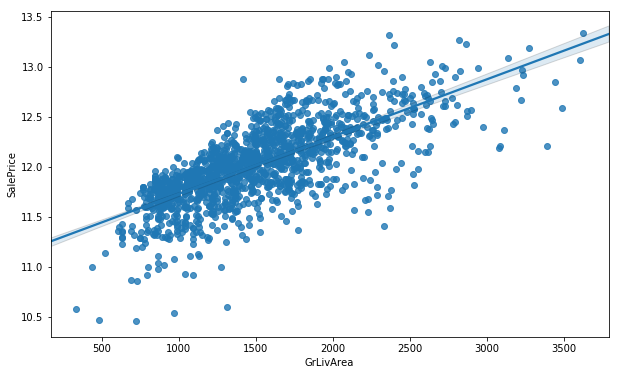

In [54]:
figure = plt.figure(figsize=(10,6))
sns.regplot(x='GrLivArea',y='SalePrice',data=combined)

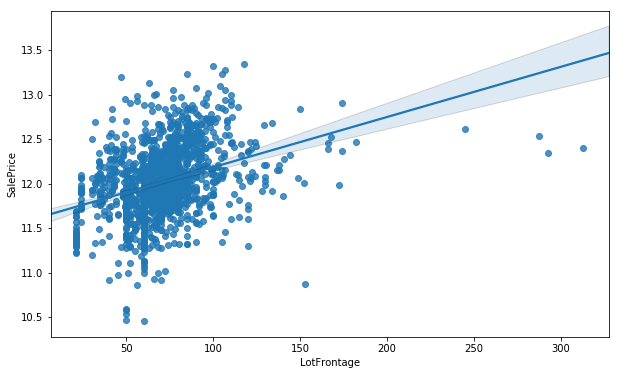

In [55]:
figure = plt.figure(figsize=(10,6))
sns.regplot(x='LotFrontage',y='SalePrice',data=combined)

In [56]:
combined[(combined['LotFrontage']> 150) & (combined['LotFrontage']< 160)].head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1211  1212          50       RL   152.000000    12134   Pave  None      IR1   
1337  1338          30       RM   153.000000     4118   Pave  Grvl      IR1   
1947  1948          20       RL   156.797959    47280   Pave  None      IR1   
2513  2514          20       RL   155.000000    20064   Pave  None      IR1   

     LandContour LotConfig LandSlope Neighborhood Condition1 Condition2  \
1211         Bnk    Inside       Mod      Gilbert       Norm       Norm   
1337         Bnk    Corner       Mod      OldTown      Feedr       Norm   
1947         Lvl    Inside       Gtl      Gilbert       Norm       Norm   
2513         Low    Inside       Sev      ClearCr       Norm       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
1211     1Fam     1.5Fin            8            7       1988          2005   
1337     1Fam     1Story            4            4       1941          1950   
1947     1Fam     1Story            6            5       1950          1950   
2513     1Fam     1Story            8            6       1976          1976   

     RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
1211     Gable  CompShg     Wd Sdng     Wd Sdng       None         0.0   
1337     Gable  CompShg     Wd Sdng     Wd Sdng       None         0.0   
1947       Hip  CompShg     AsbShng     AsbShng    BrkFace        44.0   
2513      Shed  WdShngl     Wd Sdng     Wd Sdng       None         0.0   

     ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
1211        Gd        TA       Wood       Gd       TA           Av   
1337        TA        TA     CBlock       TA       TA           No   
1947        TA        TA     CBlock       TA       TA           No   
2513        Gd        TA     CBlock       Gd       Gd           Gd   

     BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
1211          GLQ       427.0          Unf         0.0      132.0   
1337          Unf         0.0          Unf         0.0      693.0   
1947          Unf         0.0          Unf         0.0     1488.0   
2513          LwQ        51.0          GLQ       915.0        0.0   

      TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
1211        559.0    GasA        Gd          Y      SBrkr      1080       672   
1337        693.0    Grav        Fa          N      FuseA       693         0   
1947       1488.0    GasA        Gd          Y      SBrkr      1488         0   
2513        966.0    GasA        Ex          Y      SBrkr      1743         0   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
1211             0       1752           0.0           0.0         2         0   
1337             0        693           0.0           0.0         1         0   
1947             0       1488           0.0           0.0         2         1   
2513             0       1743           2.0           0.0         0         1   

      BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
1211             4             1          TA             8        Typ   
1337             2             1          Fa             4        Typ   
1947             3             1          TA             6        Typ   
2513             0             1          Gd             5        Typ   

      Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  \
1211           0        None    Basment       1988.0          RFn         2.0   
1337           0        None       None          0.0         None         0.0   
1947           1          TA     Attchd       1950.0          RFn         2.0   
2513           2          Fa     Attchd       1976.0          Fin         2.0   

      GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  \
1211       492.0         TA         TA          Y         325           12   
1337         0.0       None     

(The method of exploring outliers is based on Top 7% using ElasticNet with Interactions. I used Ridge and ElasticNet to train the training set and predict the training set. Find out the samples with unpredictable prediction results in the two algorithms as outliers)

Prepare the DataSet for Kernel Ridge and ElasticNet through an auxiliary DF called outliers.

In [57]:
#Collect the column names that are either "object" or "category" types
categorical = [i for i in combined.columns if ((combined.dtypes[i].name == 'object') or (combined.dtypes[i].name == 'category'))]

In [58]:
#OHE
outliers = combined[combined['Id']<= 1460]
y=outliers['SalePrice']
outliers = pd.get_dummies(outliers,columns=categorical)
DF_for_OD = outliers.copy()

In [59]:
outliers.drop(['SalePrice','Id'],axis=1,inplace = True)

In [60]:
rr = KernelRidge(alpha=10)
rr.fit(outliers, y)
np.sqrt(-cross_val_score(rr, outliers, y, cv=10, scoring="neg_mean_squared_error")).mean()

0.11250345348665278

In [61]:
y_pred = rr.predict(outliers)
resid = y - y_pred
mean_resid = resid.mean()
std_resid = resid.std()
z = (resid - mean_resid) / std_resid
#outliers1 =np.where(abs(z)>abs(z).std()*5)[0]
outliers1 = pd.DataFrame(z[abs(z)>abs(z).std()*5]).index
outliers1

Int64Index([30, 88, 410, 462, 495, 588, 632, 688, 710, 916, 968, 970, 1324,
            1432, 1453],
           dtype='int64')

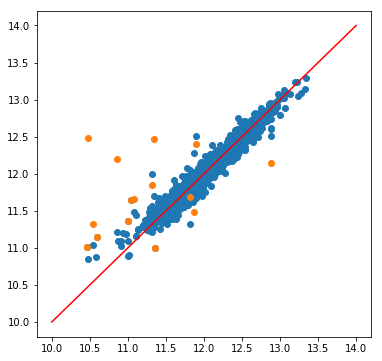

In [62]:
plt.figure(figsize=(6, 6))
plt.scatter(y, y_pred)
plt.scatter(y[outliers1], y_pred[outliers1])
plt.plot(range(10, 15), range(10, 15), color="red")

__Elastic Net__

In [63]:
er = ElasticNet(alpha=0.001, l1_ratio=0.58)
er.fit(outliers, y)
np.sqrt(-cross_val_score(rr, outliers, y, cv=5, scoring="neg_mean_squared_error")).mean()

0.1151995876695823

In [64]:
y_pred = er.predict(outliers)
resid = y - y_pred
mean_resid = resid.mean()
std_resid = resid.std()
z = (resid - mean_resid) / std_resid
outliers2 = pd.DataFrame(z[abs(z) > abs(z).std()*5]).index
#outliers2 =np.where(abs(z)>abs(z).std()*5)[0]
outliers2

Int64Index([30, 88, 410, 462, 495, 588, 632, 688, 710, 968, 970, 1324, 1432,
            1453],
           dtype='int64')

array([  30,   88,  410,  462,  495,  587,  631,  687,  708,  966,  968,
       1320, 1428, 1449], dtype=int64)

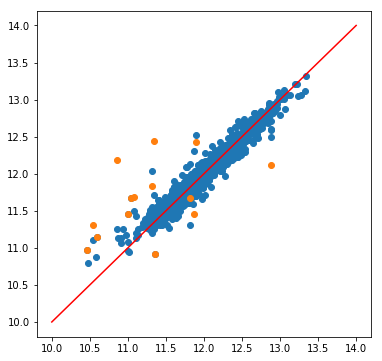

In [65]:
plt.figure(figsize=(6, 6))
plt.scatter(y, y_pred)
plt.scatter(y[outliers2], y_pred[outliers2])
plt.plot(range(10, 15), range(10, 15), color="red")

In [66]:
outlier_global_list = []
for i in outliers1:
    for j in outliers2:
        if i == j:
            outlier_global_list.append(i)

In [67]:
print(outlier_global_list)

[30, 88, 410, 462, 495, 588, 632, 688, 710, 968, 970, 1324, 1432, 1453]


In [68]:
#outlier_global_list = [30, 88, 410, 462, 495, 588, 628, 632, 874, 898, 968, 970, 1324, 1432]

Let's eliminate these outliers from the DataFrame!

In [69]:
#Local Outlier Factor (LOF)

#ground_truth = np.ones(len(combined), dtype=int)
#ground_truth[-n_outliers:] = -1

# fit the model for outlier detection (default)
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.006)
# use fit_predict to compute the predicted labels of the training samples
# (when LOF is used for outlier detection, the estimator has no predict,
# decision_function and score_samples methods).
y_pred = clf.fit_predict(DF_for_OD)
#n_errors = (y_pred != ground_truth).sum()
#X_scores = clf.negative_outlier_factor_

In [70]:
(y_pred == -1).sum()

9

In [71]:
DF_for_OD[(y_pred == -1)].index

Int64Index([249, 313, 335, 346, 451, 706, 1230, 1396, 1457], dtype='int64')

In [72]:
outliers_local_list = DF_for_OD[(y_pred == -1)].index.tolist()

In [73]:
outliers_local_list

[249, 313, 335, 346, 451, 706, 1230, 1396, 1457]

In [74]:
outliers_combined = outliers_local_list + outlier_global_list

In [75]:
outliers_combined

[249,
 313,
 335,
 346,
 451,
 706,
 1230,
 1396,
 1457,
 30,
 88,
 410,
 462,
 495,
 588,
 632,
 688,
 710,
 968,
 970,
 1324,
 1432,
 1453]

In [76]:
combined.shape

(2915, 80)

In [77]:
combined = combined.drop(set(outliers_combined),axis=0)

In [78]:
combined.shape

(2892, 80)

## Feature Engineering

### Categorical Features - Ordinal

__OverallQual and OverallCond__

In [79]:
combined[['OverallQual','OverallCond','SalePrice']].corr()['SalePrice']

OverallQual    0.825597
OverallCond   -0.054268
SalePrice      1.000000
Name: SalePrice, dtype: float64

In [80]:
combined[['OverallQual','SalePrice']].groupby('OverallQual').describe()

SalePrice                                                        \
                count       mean       std        min        25%        50%   
OverallQual                                                                   
1                 2.0  10.798825  0.310873  10.579005  10.688915  10.798825   
2                 3.0  10.825404  0.306076  10.471978  10.737047  11.002117   
3                17.0  11.411622  0.228200  10.976799  11.277216  11.418626   
4               112.0  11.577553  0.243177  10.868587  11.406102  11.592205   
5               390.0  11.782530  0.201424  10.933000  11.683431  11.798112   
6               372.0  11.965902  0.228621  11.238502  11.842236  11.982935   
7               314.0  12.219548  0.200804  11.669083  12.097574  12.206328   
8               166.0  12.498503  0.226040  11.711785  12.367345  12.505254   
9                43.0  12.793271  0.203521  12.384223  12.672884  12.751303   
10               14.0  12.958445  0.196176  12.644331  12.861812  12.976976   

                                   
                   75%        max  
OverallQual                        
1            10.908735  11.018646  
2            11.002117  11.002117  
3            11.561725  11.846544  
4            11.740069  12.452937  
5            11.897343  12.323860  
6            12.106258  12.524421  
7            12.345839  12.858322  
8            12.631262  13.195616  
9            12.873103  13.323929  
10           13.052210  13.345509

OverallQual is a highly correlated feature and seems to be Ordinal.

In [81]:
combined[['OverallCond','SalePrice']].groupby('OverallCond').describe()

SalePrice                                                        \
                count       mean       std        min        25%        50%   
OverallCond                                                                   
1                 1.0  11.018646       NaN  11.018646  11.018646  11.018646   
2                 4.0  11.654100  0.827636  11.112463  11.211910  11.309367   
3                24.0  11.456659  0.449228  10.471978  11.276971  11.413055   
4                55.0  11.661313  0.313776  10.868587  11.439828  11.652696   
5               808.0  12.146716  0.381374  10.915107  11.877576  12.131758   
6               246.0  11.890476  0.273038  11.104972  11.735477  11.868856   
7               204.0  11.918373  0.307415  11.288544  11.722787  11.884496   
8                70.0  11.909682  0.298145  11.344519  11.737075  11.856497   
9                21.0  12.184859  0.414086  11.612780  11.870607  12.066816   

                                   
                   75%        max  
OverallCond                        
1            11.018646  11.018646  
2            11.751557  12.885205  
3            11.818351  12.209193  
4            11.892833  12.367345  
5            12.386507  13.345509  
6            12.049425  12.791359  
7            12.089544  12.904210  
8            12.056679  12.721889  
9            12.594734  13.071072

OverallCond on the other hand is not Ordinal and contains categories that do not seem to be very representative (only 1 sample with value 1, only 5 with value 2).

This feature must be converted to Categorical if it is to be used. However, to reduce the number of resulting OHE categories, it may be worth reducing some of the granularity by joining the data into only a couple of categories. Based on the values, it seems that it could be divided into 2 levels, "Poor" and "Good". This is a binary feature so we can instead assign to 0 and 1 values. Let's convert it!

# !!

In [82]:
#combined['OverallCond'] = (combined['OverallCond']>= 5).astype('uint8')

__'ExterQual' 'ExterCond__

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

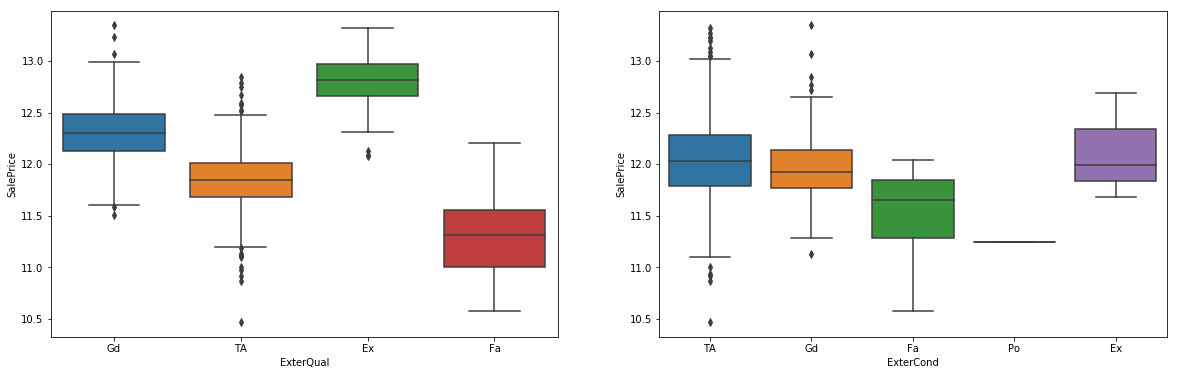

In [83]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(20,6))
sns.boxplot(x=combined['ExterQual'],y=combined['SalePrice'],ax=ax1)
sns.boxplot(x=combined['ExterCond'],y=combined['SalePrice'],ax=ax2)

As would be expected, ExterQual seems to be an ordinal feature, from Fa to Ex and we can extrapolate this (and from common sense) to Poor Quality. For this reason, it will be converted to an ordinal feature.

In [84]:
aux_dict = {'Po':'0','Fa':'1','TA':'2','Gd':'3','Ex':'4'}
combined['ExterQual'].replace(to_replace=aux_dict,inplace=True)
combined['ExterQual']= combined['ExterQual'].astype('uint8')

ExterCond however, does not show the same pattern. Let's explore further.

In [85]:
combined.groupby(['ExterCond','ExterQual'])['SalePrice'].describe()

count       mean       std        min        25%  \
ExterCond ExterQual                                                     
Ex        2            2.0  11.833807  0.219710  11.678448  11.756128   
          3            0.0        NaN       NaN        NaN        NaN   
          4            1.0  12.691584       NaN  12.691584  12.691584   
Fa        1            5.0  10.965872  0.263569  10.579005  10.915107   
          2           20.0  11.648316  0.311980  10.976799  11.387633   
          3            0.0        NaN       NaN        NaN        NaN   
Gd        1            0.0        NaN       NaN        NaN        NaN   
          2          106.0  11.861810  0.269117  11.133143  11.722368   
          3           35.0  12.277366  0.368965  11.584325  12.062487   
          4            2.0  12.369495  0.341361  12.128117  12.248806   
Po        1            0.0        NaN       NaN        NaN        NaN   
          2            1.0  11.245059       NaN  11.245059  11.245059   
TA        1            8.0  11.510497  0.369247  10.933000  11.315978   
          2          760.0  11.845423  0.274903  10.471978  11.686887   
          3          448.0  12.313641  0.263534  11.512935  12.132902   
          4           45.0  12.803613  0.270658  12.081082  12.669810   

                           50%        75%        max  
ExterCond ExterQual                                   
Ex        2          11.833807  11.911486  11.989166  
          3                NaN        NaN        NaN  
          4          12.691584  12.691584  12.691584  
Fa        1          11.002117  11.018646  11.314487  
          2          11.740465  11.864440  12.040614  
          3                NaN        NaN        NaN  
Gd        1                NaN        NaN        NaN  
          2          11.849405  12.002270  12.850557  
          3          12.254868  12.475841  13.345509  
          4          12.369495  12.490185  12.610874  
Po        1                NaN        NaN        NaN  
          2          11.245059  11.245059  11.245059  
TA        1          11.501045  11.634130  12.206078  
          2          11.848869  12.028745  12.791359  
          3          12.303655  12.488336  13.229570  
          4          12.841328  12.988043  13.323929

In [86]:
aux_dict = {'Po':'0','Fa':'1','TA':'2','Gd':'3','Ex':'4'}
combined['ExterCond'].replace(to_replace=aux_dict,inplace=True)
combined['ExterCond']= combined['ExterCond'].astype('uint8')

ExterCond, strangely does not seem to have have any regular property and will therefore be dropped before model training, as ExterQual seems to be the relevant property.

__'BsmtQual' 'BsmtCond'__

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

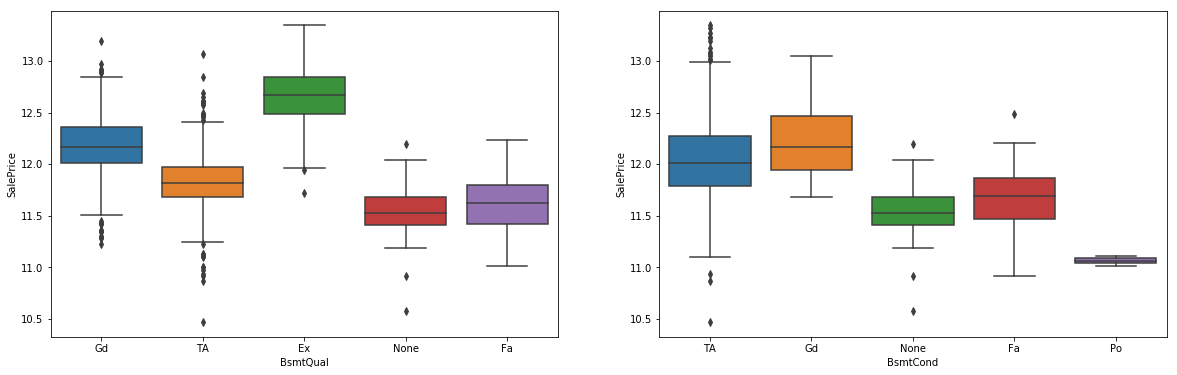

In [87]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(20,6))
sns.boxplot(x=combined['BsmtQual'],y=combined['SalePrice'],ax=ax1)
sns.boxplot(x=combined['BsmtCond'],y=combined['SalePrice'],ax=ax2)

Both features seem Ordinal in nature. BsmtCond has 'Poor' quality entries which have worse SalePrices associated when compared to "None". Let's consider this when encoding both features to ordinal.

In [88]:
#Create map for ordinal convertion
aux_dict = {'Po':'0','None':'1','Fa':'2','TA':'3','Gd':'4','Ex':'5'}
#Change Feature to Ordinal
combined['BsmtQual'].replace(to_replace=aux_dict,inplace=True)
combined['BsmtQual']= combined['BsmtQual'].astype('uint8')
#Change Feature to Ordinal
combined['BsmtCond'].replace(to_replace=aux_dict,inplace=True)
combined['BsmtCond']= combined['BsmtCond'].astype('uint8')

__'BsmtExposure'__

BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

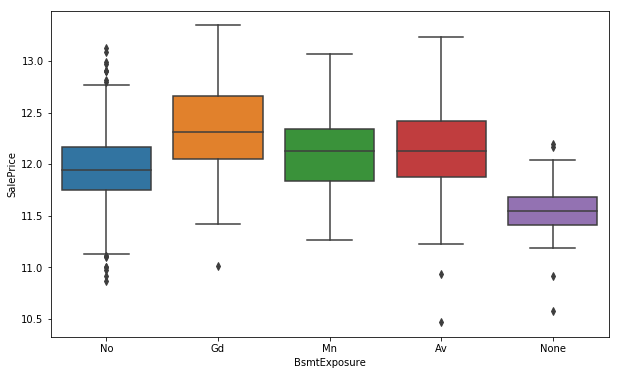

In [89]:
plt.figure(figsize=(10,6))
sns.boxplot(x=combined['BsmtExposure'],y=combined['SalePrice'])

In [90]:
combined.groupby('BsmtExposure')['SalePrice'].describe()

count       mean       std        min        25%        50%  \
BsmtExposure                                                                
Av            217.0  12.150677  0.391420  10.471978  11.881042  12.132701   
Gd            125.0  12.355532  0.431038  11.018646  12.049425  12.317171   
Mn            113.0  12.096299  0.388008  11.264477  11.840797  12.128117   
No            940.0  11.965629  0.337808  10.868587  11.751950  11.949249   
None           38.0  11.546484  0.302211  10.579005  11.407576  11.552167   

                    75%        max  
BsmtExposure                        
Av            12.422510  13.229570  
Gd            12.665398  13.345509  
Mn            12.343471  13.071072  
No            12.165256  13.126033  
None          11.686362  12.198549

This feature is Ordinal and shall be converted

In [91]:
#Create map for ordinal convertion
aux_dict = {'None':'0','No':'1','Mn':'2','Av':'3','Gd':'4'}
#Change Feature to Ordinal
combined['BsmtExposure'].replace(to_replace=aux_dict,inplace=True)
combined['BsmtExposure']= combined['BsmtExposure'].astype('uint8')

__'HeatingQC'__

		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		

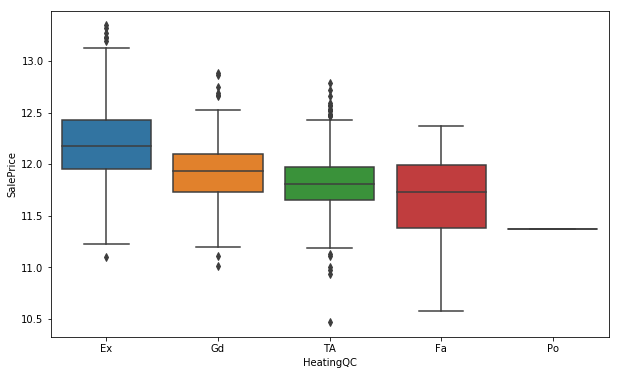

In [92]:
fig = plt.figure(figsize=(10,6))
sns.boxplot(x=combined['HeatingQC'],y=combined['SalePrice'])

HeatingQC seems to be an ordinal feature. Let's convert it!

In [93]:
#Create map for converting to Ordinal
aux_dict = {'Po':'0','Fa':'1','TA':'2','Gd':'3','Ex':'4'}
#Converts feature
combined['HeatingQC'].replace(to_replace=aux_dict,inplace=True)
combined['HeatingQC'] = combined['HeatingQC'].astype('uint8')

__'KitchenQual'__

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

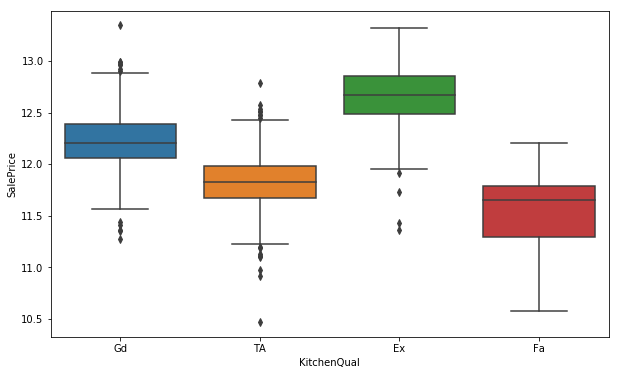

In [94]:
plt.figure(figsize=(10,6))
sns.boxplot(x=combined['KitchenQual'],y=combined['SalePrice'])

KitchenQual is an ordinal feature, as expected. Let's convert it.

In [95]:
#Create map for converting to Ordinal
aux_dict = {'Po':'0','Fa':'1','TA':'2','Gd':'3','Ex':'4'}
#Converts feature
combined['KitchenQual'].replace(to_replace=aux_dict,inplace=True)
combined['KitchenQual'] = combined['KitchenQual'].astype('uint8')

__'GarageFinish'__

GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

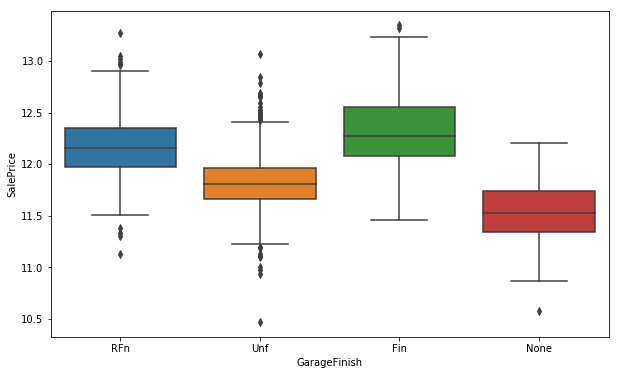

In [96]:
plt.figure(figsize=(10,6))
sns.boxplot(x=combined['GarageFinish'],y=combined['SalePrice'])

In [97]:
combined.groupby('GarageFinish')['SalePrice'].describe()

count       mean       std        min        25%        50%  \
GarageFinish                                                                
Fin           345.0  12.317589  0.345283  11.459008  12.078245  12.278398   
None           75.0  11.526303  0.302199  10.579005  11.344519  11.532738   
RFn           416.0  12.169908  0.289059  11.133143  11.970357  12.154785   
Unf           597.0  11.822036  0.287427  10.471978  11.661785  11.813037   

                    75%        max  
GarageFinish                        
Fin           12.554840  13.345509  
None          11.739998  12.208575  
RFn           12.352879  13.275829  
Unf           11.964007  13.071072

In [98]:
#Create map for converting to Ordinal
aux_dict = {'None':'0','Unf':'1','RFn':'2','Fin':'3'}
#Converts feature
combined['GarageFinish'].replace(to_replace=aux_dict,inplace=True)
combined['GarageFinish'] = combined['GarageFinish'].astype('uint8')

__'GarageQual' 'GarageCond'__

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

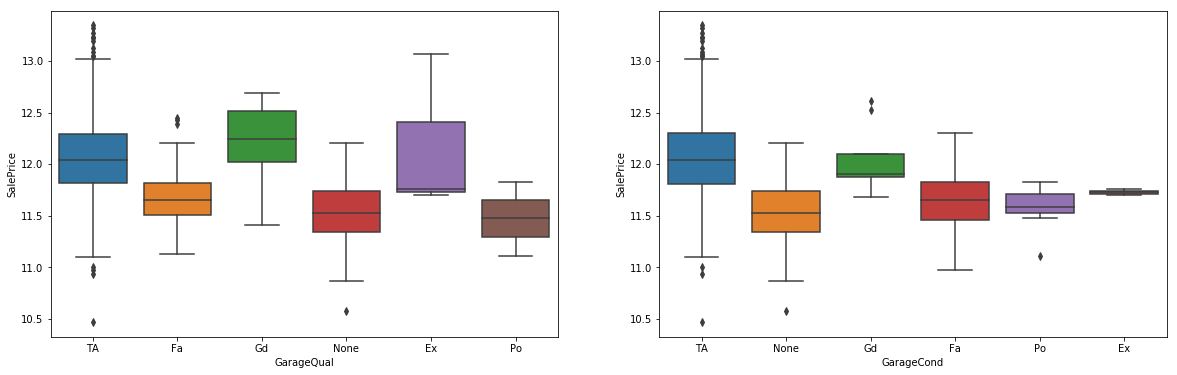

In [99]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(20,6))
sns.boxplot(x=combined['GarageQual'],y=combined['SalePrice'],ax=ax1)
sns.boxplot(x=combined['GarageCond'],y=combined['SalePrice'],ax=ax2)

In [100]:
combined.groupby('GarageQual')['SalePrice'].describe()

count       mean       std        min        25%        50%  \
GarageQual                                                                 
Ex             3.0  12.175455  0.776141  11.699413  11.727646  11.755879   
Fa            47.0  11.687629  0.298914  11.134604  11.512935  11.652696   
Gd            14.0  12.220073  0.381124  11.411457  12.019128  12.243951   
None          75.0  11.526303  0.302199  10.579005  11.344519  11.532738   
Po             3.0  11.472505  0.357665  11.112463  11.294886  11.477309   
TA          1291.0  12.067128  0.364269  10.471978  11.814886  12.043501   

                  75%        max  
GarageQual                        
Ex          12.413476  13.071072  
Fa          11.822030  12.452937  
Gd          12.512818  12.691584  
None        11.739998  12.208575  
Po          11.652526  11.827744  
TA          12.298451  13.345509

GarageQual seems to be ordinal, with None and Po sharing similar Stats. They will be grouped in the lowest ordinal level.

In [101]:
#Create map for converting to Ordinal
aux_dict = {'None':'0','Po':'0','Fa':'1','TA':'2','Gd':'3','Ex':'4'}
#Converts feature
combined['GarageQual'].replace(to_replace=aux_dict,inplace=True)
combined['GarageQual'] = combined['GarageQual'].astype('uint8')

In [102]:
combined.groupby('GarageCond')['SalePrice'].describe()

count       mean       std        min        25%        50%  \
GarageCond                                                                 
Ex             2.0  11.727646  0.039928  11.699413  11.713530  11.727646   
Fa            33.0  11.643032  0.285878  10.976799  11.461643  11.652696   
Gd             9.0  12.050621  0.322364  11.682677  11.877576  11.904974   
None          75.0  11.526303  0.302199  10.579005  11.344519  11.532738   
Po             7.0  11.572888  0.233637  11.112463  11.524256  11.589896   
TA          1307.0  12.067991  0.366233  10.471978  11.813037  12.043560   

                  75%        max  
GarageCond                        
Ex          11.741763  11.755879  
Fa          11.831386  12.301387  
Gd          12.100718  12.618186  
None        11.739998  12.208575  
Po          11.715799  11.827744  
TA          12.301387  13.345509

This feature is ordinal, however, it displays some annomalies, as Gd quality GarageCond have similar mean SalePrice as TA garages. Most garages are also TA.

This feature will be grouped into 4 values, 0 for None, 1 por Po, 2 for Fa and 3 for TA or better.

In [103]:
#Create map for converting to Ordinal
aux_dict = {'None':'0','Po':'1','Fa':'2','TA':'3','Gd':'3','Ex':'3'}
#Converts feature
combined['GarageCond'].replace(to_replace=aux_dict,inplace=True)
combined['GarageCond'] = combined['GarageCond'].astype('uint8')

__'Fence'__

Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

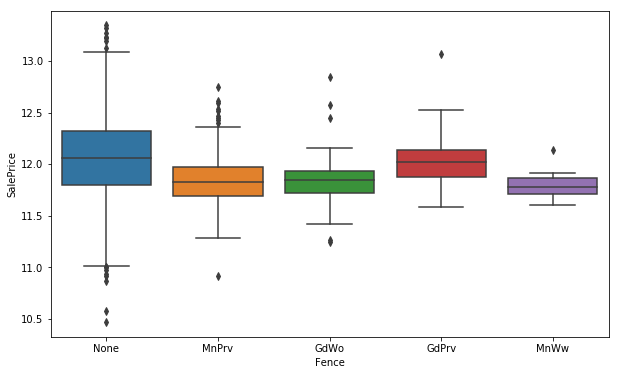

In [104]:
plt.figure(figsize=(10,6))
sns.boxplot(x=combined['Fence'],y=combined['SalePrice'])

In [105]:
combined.groupby('Fence')['SalePrice'].describe()

count       mean       std        min        25%        50%  \
Fence                                                                 
GdPrv    58.0  12.049601  0.258674  11.589896  11.880853  12.021226   
GdWo     51.0  11.849117  0.278508  11.245059  11.719948  11.845827   
MnPrv   154.0  11.851147  0.277696  10.915107  11.694630  11.831205   
MnWw     11.0  11.796808  0.151907  11.608245  11.707602  11.775297   
None   1159.0  12.059064  0.400013  10.471978  11.796229  12.061053   

             75%        max  
Fence                        
GdPrv  12.142805  13.071072  
GdWo   11.936552  12.850557  
MnPrv  11.970357  12.751303  
MnWw   11.870509  12.138869  
None   12.319406  13.345509

Strangely Good fences do not seem to correspond to better SalePrices than other fences as would be expected. This feature will be discarded.

In [106]:
combined.drop('Fence',axis=1,inplace=True)

### Categorical Features

__Street__

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved

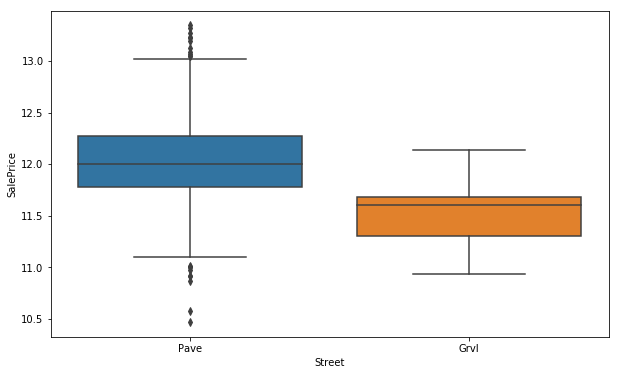

In [107]:
plt.figure(figsize=(10,6))
sns.boxplot(x=combined['Street'],y=combined['SalePrice'])

In [108]:
combined['Street'].unique()

array(['Pave', 'Grvl'], dtype=object)

There are only 2 options, Paved and Gravel. It is also clear that this feature is relevant, therefore it will be combined into a binary feature.

In [109]:
combined['Street'] = (combined['Street']=='Pave').astype('uint8')

__MSSubClass__

This feature identifies the type of dwelling involved in the sale. This information should be condensed on the other features and we will therefore not use it.

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES


In [110]:
combined[['MSSubClass','SalePrice']].groupby('MSSubClass').describe()

SalePrice                                                        \
               count       mean       std        min        25%        50%   
MSSubClass                                                                   
20             524.0  12.055410  0.375490  10.471978  11.797170  11.981042   
30              66.0  11.462725  0.246313  10.868587  11.322076  11.512935   
40               4.0  11.870430  0.486844  11.283525  11.669465  11.864877   
45              12.0  11.579043  0.190143  11.238502  11.451400  11.585082   
50             140.0  11.821832  0.310794  11.104972  11.651607  11.790558   
60             295.0  12.333859  0.277773  11.767575  12.128117  12.279328   
70              58.0  11.978505  0.310607  11.264477  11.763669  11.957597   
75              16.0  12.064786  0.447735  11.522886  11.740514  12.004570   
80              58.0  12.021831  0.194213  11.580593  11.899890  12.022739   
85              20.0  11.895873  0.126174  11.719948  11.808209  11.854481   
90              51.0  11.773597  0.204322  11.314487  11.680563  11.820123   
120             87.0  12.171560  0.275223  11.507923  11.970581  12.165256   
150              0.0        NaN       NaN        NaN        NaN        NaN   
160             63.0  11.807198  0.262061  11.225257  11.643924  11.891369   
180             10.0  11.501760  0.267467  11.231901  11.312792  11.390370   
190             29.0  11.713951  0.265434  10.915107  11.585255  11.755879   

                                  
                  75%        max  
MSSubClass                        
20          12.301387  13.323929  
30          11.612780  12.004574  
40          12.065842  12.468441  
45          11.712807  11.845110  
50          11.976666  12.923915  
60          12.496877  13.345509  
70          12.149110  12.791359  
75          12.298889  13.071072  
80          12.097508  12.751303  
85          11.972396  12.198549  
90          11.881036  12.237092  
120         12.354460  12.880294  
150               NaN        NaN  
160         12.012797  12.384223  
180         11.744442  11.904974  
190         11.849405  12.206078

In [111]:
combined['MSSubClass'].describe()

count    2892.000000
mean       57.259682
std        42.561157
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64

This feature should be converted into categorical if it is to be used!

In [112]:
combined['MSSubClass'] = combined['MSSubClass'].astype('category')

In [113]:
combined[['MSSubClass','SalePrice']].corr()

SalePrice
SalePrice        1.0

### Quantitative Discrete Features

__BsmtFullBath BsmtHalfBath FullBath HalfBath__

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

In [114]:
combined[['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','SalePrice']].corr()['SalePrice']

BsmtFullBath    0.226716
BsmtHalfBath   -0.022511
FullBath        0.594479
HalfBath        0.314740
SalePrice       1.000000
Name: SalePrice, dtype: float64

Unsurprisingly, bathrooms are correlated with SalePrice. However this is clearly more true in FullBath than the remaining features. Let's use groupby to further explore these features.

In [115]:
combined[['FullBath','SalePrice']].groupby('FullBath').describe()

SalePrice                                                        \
             count       mean       std        min        25%        50%   
FullBath                                                                   
0              9.0  11.810881  0.721186  10.471978  11.598736  11.884496   
1            638.0  11.778495  0.277564  10.579005  11.635152  11.794345   
2            756.0  12.215513  0.321774  10.915107  12.036919  12.188423   
3             30.0  12.619090  0.397540  12.043560  12.237860  12.658590   
4              0.0        NaN       NaN        NaN        NaN        NaN   

                                
                75%        max  
FullBath                        
0         12.176654  12.861001  
1         11.924627  12.955130  
2         12.411693  13.323929  
3         12.932295  13.345509  
4               NaN        NaN

There seem to be 9 houses with no bathrooms above ground. Curiously, the houses that do not have FullBath have larger mean SalePrice than houses with 1 FullBath.

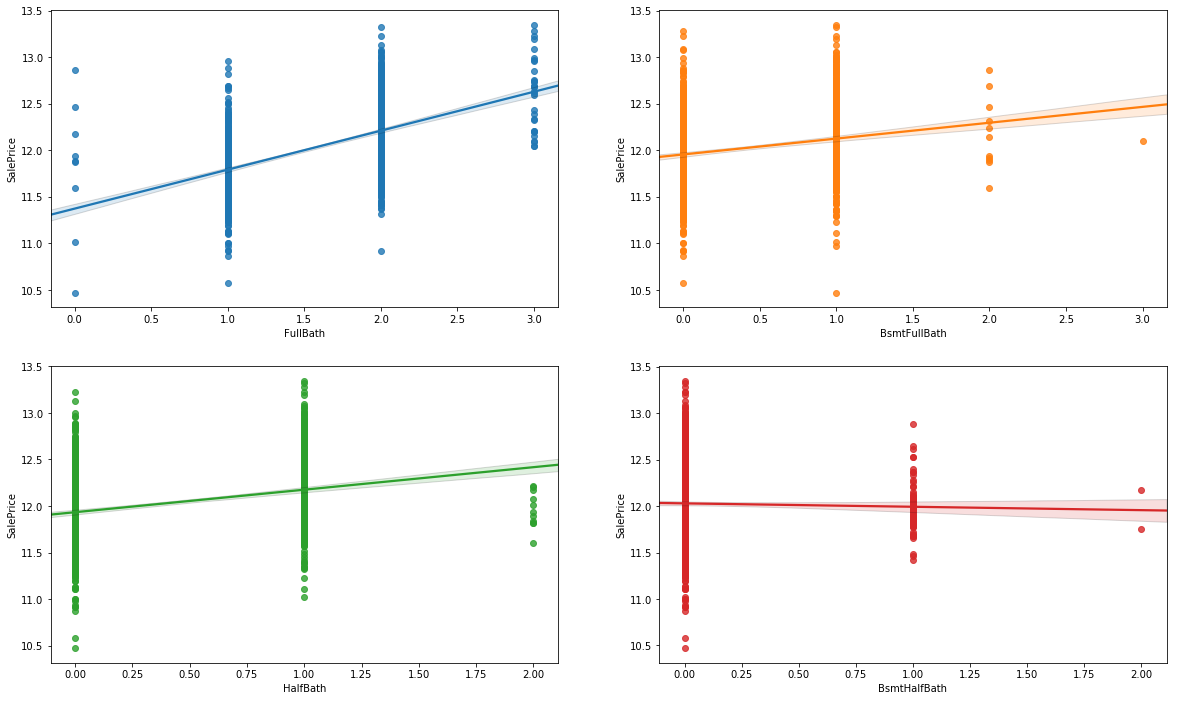

In [116]:
#Set Subplots
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(20,12))

ax = sns.regplot(x='FullBath',y='SalePrice',data=combined,ax=axs[0,0])
ax = sns.regplot(x='BsmtFullBath',y='SalePrice',data=combined,ax=axs[0,1])
ax = sns.regplot(x='HalfBath',y='SalePrice',data=combined,ax=axs[1,0])
ax = sns.regplot(x='BsmtHalfBath',y='SalePrice',data=combined,ax=axs[1,1])

In [117]:
# As it is a discrete number, let's conserve memory
combined['FullBath'] = combined['FullBath'].astype('uint8')

What about HalfBath?

In [118]:
combined[['HalfBath','SalePrice']].groupby('HalfBath').describe()

SalePrice                                                        \
             count       mean       std        min        25%        50%   
HalfBath                                                                   
0            892.0  11.928124  0.371189  10.471978  11.695047  11.870607   
1            530.0  12.194342  0.354406  11.018646  11.970357  12.149508   
2             11.0  11.962768  0.194616  11.598736  11.831327  11.940400   

                                
                75%        max  
HalfBath                        
0         12.149508  13.226725  
1         12.388398  13.345509  
2         12.124601  12.215037

In [119]:
# As it is a discrete number, let's conserve memory
combined['HalfBath'] = combined['HalfBath'].astype('uint8')

And BsmtFullBath?

In [120]:
combined[['BsmtFullBath','SalePrice']].groupby('BsmtFullBath').describe()

SalePrice                                                        \
                 count       mean       std        min        25%        50%   
BsmtFullBath                                                                   
0.0              839.0  11.952279  0.362208  10.579005  11.711785  11.951187   
1.0              582.0  12.131407  0.394685  10.471978  11.849405  12.085321   
2.0               11.0  12.176564  0.383098  11.598736  11.904540  12.144203   
3.0                1.0  12.095147       NaN  12.095147  12.095147  12.095147   

                                    
                    75%        max  
BsmtFullBath                        
0.0           12.170447  13.275829  
1.0           12.391517  13.345509  
2.0           12.392806  12.861001  
3.0           12.095147  12.095147

In [121]:
# As it is a discrete number, let's conserve memory
combined['BsmtFullBath'] = combined['BsmtFullBath'].astype('uint8')

And BsmtHalfBath?

In [122]:
combined[['BsmtHalfBath','SalePrice']].groupby('BsmtHalfBath').describe()

SalePrice                                                        \
                 count       mean       std        min        25%        50%   
BsmtHalfBath                                                                   
0.0             1353.0  12.028952  0.392007  10.471978  11.771444  12.007628   
1.0               78.0  11.991962  0.260758  11.424105  11.834099  11.971936   
2.0                2.0  11.966267  0.297533  11.755879  11.861073  11.966267   

                                    
                    75%        max  
BsmtHalfBath                        
0.0           12.278398  13.345509  
1.0           12.088136  12.880294  
2.0           12.071460  12.176654

In [123]:
combined['BsmtHalfBath'] = combined['BsmtHalfBath'].astype('uint8')

__BedroomAbvGr KitchenAbvGr TotRoomsAbvGrd__

BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)

KitchenAbvGr: Kitchens above grade

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

In [124]:
combined[['BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','SalePrice']].corr()['SalePrice']

BedroomAbvGr    0.207638
KitchenAbvGr   -0.157849
TotRmsAbvGrd    0.539639
SalePrice       1.000000
Name: SalePrice, dtype: float64

TotRmsAbvGrd seems to be the most promising feature! But let's explore them all

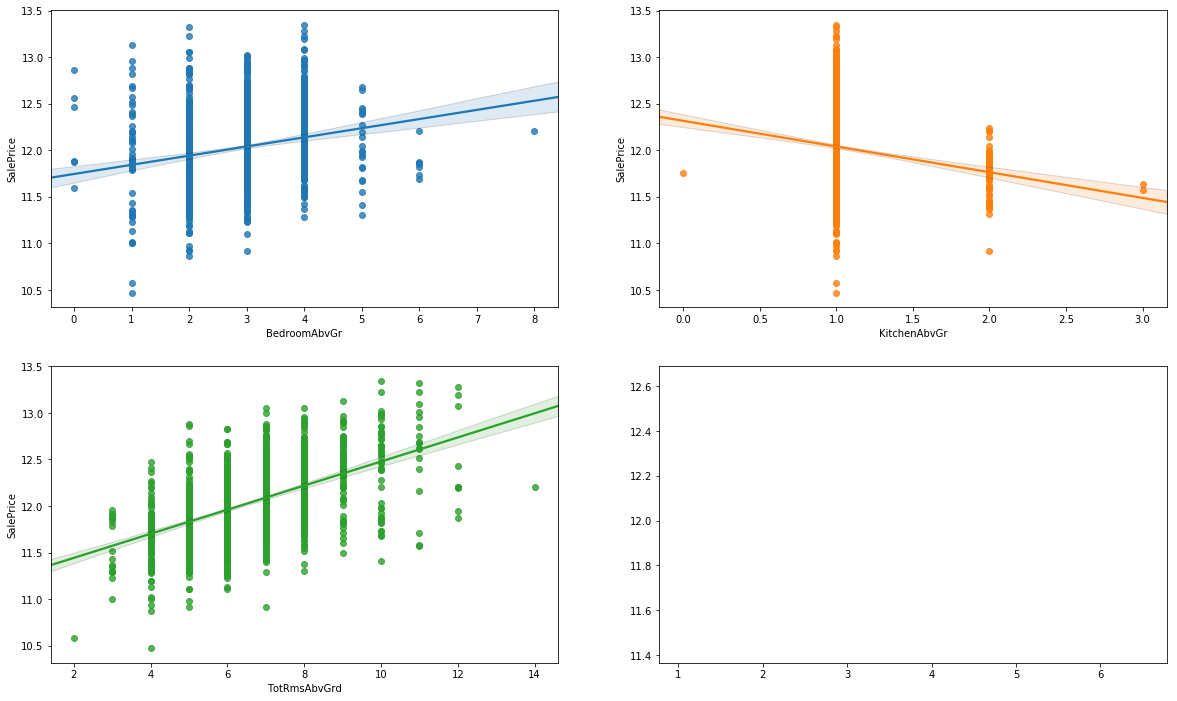

In [125]:
#Set Subplots
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(20,12))

ax = sns.regplot(x='BedroomAbvGr',y='SalePrice',data=combined,ax=axs[0,0])
ax = sns.regplot(x='KitchenAbvGr',y='SalePrice',data=combined,ax=axs[0,1])
ax = sns.regplot(x='TotRmsAbvGrd',y='SalePrice',data=combined,ax=axs[1,0])

It seems having more than 1 kitchen is undesirable, presumably because it is a space that is uselessly occupied! Let's use these 3 features for our model.

In [126]:
combined['BedroomAbvGr'] = combined['BedroomAbvGr'].astype('uint8')
combined['KitchenAbvGr'] = combined['KitchenAbvGr'].astype('uint8')
combined['TotRmsAbvGrd'] = combined['TotRmsAbvGrd'].astype('uint8')

__Fireplaces__

Fireplaces: Number of fireplaces

In [127]:
combined[['Fireplaces','SalePrice']].groupby('Fireplaces').describe()

SalePrice                                                        \
               count       mean       std        min        25%        50%   
Fireplaces                                                                   
0              680.0  11.819382  0.308378  10.471978  11.635152  11.817656   
1              644.0  12.203441  0.346339  11.002117  11.970357  12.154785   
2              105.0  12.270016  0.376767  11.512935  11.982935  12.215037   
3                4.0  12.482680  0.336634  12.154785  12.211774  12.491036   
4                0.0        NaN       NaN        NaN        NaN        NaN   

                                  
                  75%        max  
Fireplaces                        
0           12.013707  12.744447  
1           12.448729  13.345509  
2           12.509878  13.323929  
3           12.761942  12.793862  
4                 NaN        NaN

This is a good discrete feature. Let's use it!

In [128]:
combined['Fireplaces'] = combined['Fireplaces'].astype('uint8')

### Quantitative Continuous Features

__YearBuilt__ 

#A melhorar!

Let's start by looking into the YearBuilt feature.

In [129]:
print('There is a correlation between "YearBuilt" and "SalePrice" of {:.4f}'.format(combined['YearBuilt'].corr(combined['SalePrice'])))

There is a correlation between "YearBuilt" and "SalePrice" of 0.5925


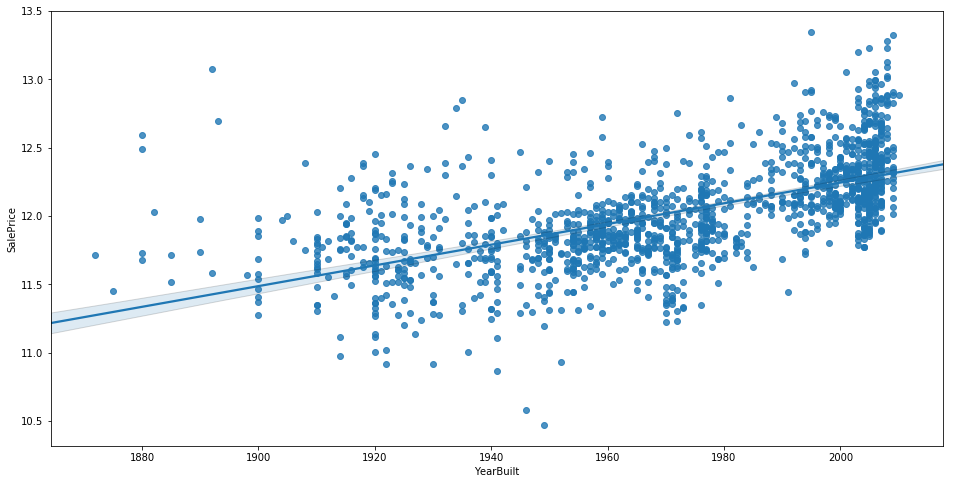

In [130]:
plt.figure(figsize=(16,8))
sns.regplot(x='YearBuilt',y='SalePrice',data=combined)

There is a reasonable correlation between this feature and SalePrice. However, there are outliers spread along the data and differences in variance that can be seen in older houses, when compared with more recent ones! 

Let's consider binning this data according to the decade the house was built (this case, 14 bins corresponding to the 140 years this data spans).

In [131]:
combined['YearBuilt_Bins'] = pd.cut(combined['YearBuilt'],bins=14)

In [132]:
combined.groupby('YearBuilt_Bins')['SalePrice'].describe()

count       mean       std        min        25%  \
YearBuilt_Bins                                                           
(1871.862, 1881.857]    6.0  11.941834  0.477319  11.451061  11.683598   
(1881.857, 1891.714]    5.0  11.795123  0.211884  11.512935  11.715874   
(1891.714, 1901.571]   14.0  11.783072  0.511722  11.277216  11.481311   
(1901.571, 1911.429]   22.0  11.730083  0.247446  11.302217  11.612749   
(1911.429, 1921.286]   73.0  11.742913  0.324282  10.976799  11.561725   
(1921.286, 1931.143]   75.0  11.682159  0.323862  10.915107  11.512435   
(1931.143, 1941.0]     70.0  11.783399  0.397547  10.868587  11.565271   
(1941.0, 1950.857]     64.0  11.699471  0.330259  10.471978  11.600241   
(1950.857, 1960.714]  161.0  11.849365  0.242666  10.933000  11.732069   
(1960.714, 1970.571]  178.0  11.887907  0.231569  11.225257  11.767575   
(1970.571, 1980.429]  170.0  11.911234  0.273392  11.231901  11.751950   
(1980.429, 1990.286]   63.0  12.163493  0.290848  11.626263  12.003034   
(1990.286, 2000.143]  173.0  12.264381  0.271574  11.445727  12.083911   
(2000.143, 2010.0]    359.0  12.359568  0.309332  11.775297  12.133238   

                            50%        75%        max  
YearBuilt_Bins                                         
(1871.862, 1881.857]  11.719915  12.300394  12.594734  
(1881.857, 1891.714]  11.735277  11.979805  12.031725  
(1891.714, 1901.571]  11.579407  11.880364  13.071072  
(1901.571, 1911.429]  11.746010  11.824067  12.388398  
(1911.429, 1921.286]  11.759793  11.950541  12.452937  
(1921.286, 1931.143]  11.669083  11.866950  12.363081  
(1931.143, 1941.0]    11.742057  11.982049  12.850557  
(1941.0, 1950.857]    11.732061  11.866004  12.466516  
(1950.857, 1960.714]  11.842236  11.951187  12.721889  
(1960.714, 1970.571]  11.873744  12.031576  12.524421  
(1970.571, 1980.429]  11.906661  12.072547  12.751303  
(1980.429, 1990.286]  12.116700  12.340389  12.861001  
(1990.286, 2000.143]  12.220966  12.421188  13.345509  
(2000.143, 2010.0]    12.323860  12.544331  13.323929

There is a clear tendency for recent houses (from the 80's onwards) commanding ever rising prices. This is not true of older decades, and rises and falls can be captured this way. 

Note that the 1870 decade has a mean price comparable only to 1970's onwards and some low points can be seen in the 1900's and 1920's!

Let's therefore drop the feature'YearBuilt' and use this new feature in OHE form.

In [133]:
combined.drop('YearBuilt',axis=1,inplace=True)

__YearRemodAdd__

This feature includes the year the house was remodeled. If never remodeled, the year is the same as the year of construction.

In [134]:
combined['YearRemodAdd'].describe()

count    2892.000000
mean     1984.267635
std        20.880802
min      1950.000000
25%      1965.000000
50%      1993.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64

In [135]:
print('There is a correlation between "YearRemodAdd" and "SalePrice" of {:.4f}'.format(combined['YearRemodAdd'].corr(combined['SalePrice'])))

There is a correlation between "YearRemodAdd" and "SalePrice" of 0.5791


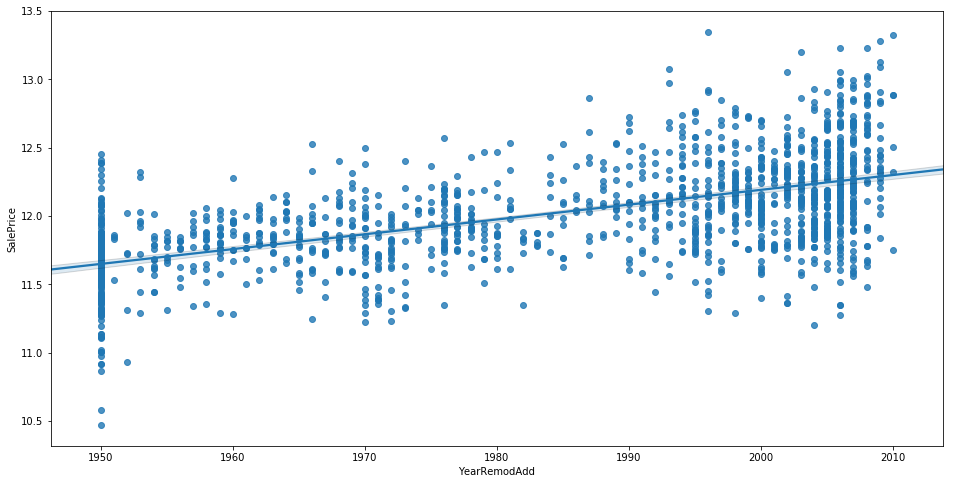

In [136]:
plt.figure(figsize=(16,8))
sns.regplot(x='YearRemodAdd',y='SalePrice',data=combined)

It seems all houses from before 1950 that either were or not remodeled before this date have been given a 1950 date. 

Using this feature may be dangerous as we have no way of knowing if a house was or not remodeled. 

However, let's try and bin them by decade periods and see if any useful information can be gathered.

In [137]:
combined['YearRemodAdd_Bins'] = pd.cut(combined['YearRemodAdd'],bins=6)

In [138]:
combined[['YearRemodAdd_Bins','SalePrice']].groupby('YearRemodAdd_Bins').describe()

SalePrice                                             \
                      count       mean       std        min        25%   
YearRemodAdd_Bins                                                        
(1949.94, 1960.0]     278.0  11.683020  0.296632  10.471978  11.532738   
(1960.0, 1970.0]      146.0  11.848067  0.235063  11.225257  11.728045   
(1970.0, 1980.0]      156.0  11.879359  0.250144  11.231901  11.733469   
(1980.0, 1990.0]       85.0  12.081022  0.292778  11.344519  11.867104   
(1990.0, 2000.0]      282.0  12.145286  0.327233  11.288544  11.944227   
(2000.0, 2010.0]      486.0  12.246385  0.366838  11.198228  11.982755   

                                                    
                         50%        75%        max  
YearRemodAdd_Bins                                   
(1949.94, 1960.0]  11.710142  11.855100  12.452937  
(1960.0, 1970.0]   11.845642  11.989934  12.524421  
(1970.0, 1980.0]   11.894101  12.043118  12.567241  
(1980.0, 1990.0]   12.072547  12.259618  12.861001  
(1990.0, 2000.0]   12.106258  12.347468  13.345509  
(2000.0, 2010.0]   12.233082  12.479437  13.323929

Grouping by bins seem to result in an ordinal feature. Let's convert it into ordinal

In [139]:
mapper = {0:'(1949.94, 1960.0]', 1: '(1960.0, 1970.0]', 2: '(1970.0, 1980.0]', 3: '(1980.0, 1990.0]', 4: '(1990.0, 2000.0]', 5: '(2000.0, 2010.0]'}
ordvar = combined['YearRemodAdd_Bins'].replace(mapper)
#aux_DF['YearRemodAdd_Ord'] = aux_DF['YearRemodAdd_Bins'].replace(mapper)
print(pd.factorize(ordvar))

(array([0, 1, 0, ..., 3, 3, 3], dtype=int64), CategoricalIndex([ (2000.0, 2010.0],  (1970.0, 1980.0],  (1960.0, 1970.0],
                   (1990.0, 2000.0], (1949.94, 1960.0],  (1980.0, 1990.0]],
                 categories=[(1949.94, 1960.0], (1960.0, 1970.0], (1970.0, 1980.0], (1980.0, 1990.0], (1990.0, 2000.0], (2000.0, 2010.0]], ordered=True, dtype='category'))


In [140]:
labels = LabelEncoder()
y = labels.fit_transform(combined['YearRemodAdd_Bins'].values)
y

array([5, 2, 5, ..., 4, 4, 4])

In [141]:
combined['YearRemodAdd'] = labels.fit_transform(combined['YearRemodAdd_Bins'].values)

In [142]:
combined.drop('YearRemodAdd_Bins',axis=1,inplace=True)

__Area Features__

- LotFrontage;
- LotArea;
- BsmtUnfSF - Unfinished square feet of basement area;
- BsmtFinSF1 - Type 1 finished square feet;
- BsmtFinSF2 - Type 2 finished square feet;
- BsmtUnfSF: Unfinished square feet of basement area;
- TotalBsmtSF: Total square feet of basement area;
- 1stFlrSF;
- 2ndFlrSF;
- GrLivArea - Above grade (ground) living area square feet;
- WoodDeckSF;
- OpenPorchSF;
- EnclosedPorch;
- 3SsnPorch;
- ScreenPorch.

In [143]:
combined[['LotFrontage','LotArea','1stFlrSF','2ndFlrSF','GrLivArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','GarageArea','SalePrice']].corr()

LotFrontage   LotArea  1stFlrSF  2ndFlrSF  GrLivArea  \
LotFrontage       1.000000  0.649247  0.422420  0.013047   0.341060   
LotArea           0.649247  1.000000  0.416784  0.052820   0.372191   
1stFlrSF          0.422420  0.416784  1.000000 -0.275981   0.540634   
2ndFlrSF          0.013047  0.052820 -0.275981  1.000000   0.654436   
GrLivArea         0.341060  0.372191  0.540634  0.654436   1.000000   
WoodDeckSF        0.121915  0.196980  0.223155  0.086548   0.248237   
OpenPorchSF       0.149090  0.156739  0.230242  0.182721   0.338692   
EnclosedPorch     0.031468  0.051720 -0.062305  0.056057   0.007568   
3SsnPorch         0.042256  0.031430  0.046210 -0.032612   0.007389   
ScreenPorch       0.070938  0.101963  0.103353  0.011974   0.091865   
GarageArea        0.338875  0.305040  0.482642  0.120993   0.477727   
SalePrice         0.361489  0.387994  0.617771  0.311237   0.726270   

               WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
LotFrontage      0.121915     0.149090       0.031468   0.042256     0.070938   
LotArea          0.196980     0.156739       0.051720   0.031430     0.101963   
1stFlrSF         0.223155     0.230242      -0.062305   0.046210     0.103353   
2ndFlrSF         0.086548     0.182721       0.056057  -0.032612     0.011974   
GrLivArea        0.248237     0.338692       0.007568   0.007389     0.091865   
WoodDeckSF       1.000000     0.038127      -0.117872  -0.003903    -0.052110   
OpenPorchSF      0.038127     1.000000      -0.062506  -0.009254     0.049452   
EnclosedPorch   -0.117872    -0.062506       1.000000  -0.032849    -0.064212   
3SsnPorch       -0.003903    -0.009254      -0.032849   1.000000    -0.029799   
ScreenPorch     -0.052110     0.049452      -0.064212  -0.029799     1.000000   
GarageArea       0.232576     0.233546      -0.106373   0.029728     0.063035   
SalePrice        0.329276     0.359190      -0.137978   0.056525     0.125094   

               GarageArea  SalePrice  
LotFrontage      0.338875   0.361489  
LotArea          0.305040   0.387994  
1stFlrSF         0.482642   0.617771  
2ndFlrSF         0.120993   0.311237  
GrLivArea        0.477727   0.726270  
WoodDeckSF       0.232576   0.329276  
OpenPorchSF      0.233546   0.359190  
EnclosedPorch   -0.106373  -0.137978  
3SsnPorch        0.029728   0.056525  
ScreenPorch      0.063035   0.125094  
GarageArea       1.000000   0.656497  
SalePrice        0.656497   1.000000

__Porch related areas__

In [144]:
combined[['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']].sample(10)

WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch
2242          92           26              0          0            0
501            0          108              0          0            0
1874           0           81              0          0            0
2106           0          299              0          0            0
809           40          156              0          0            0
880            0           49              0          0            0
1802           0           55              0          0            0
1461         393           36              0          0            0
853          180            0              0          0            0
2835         144           45              0          0            0

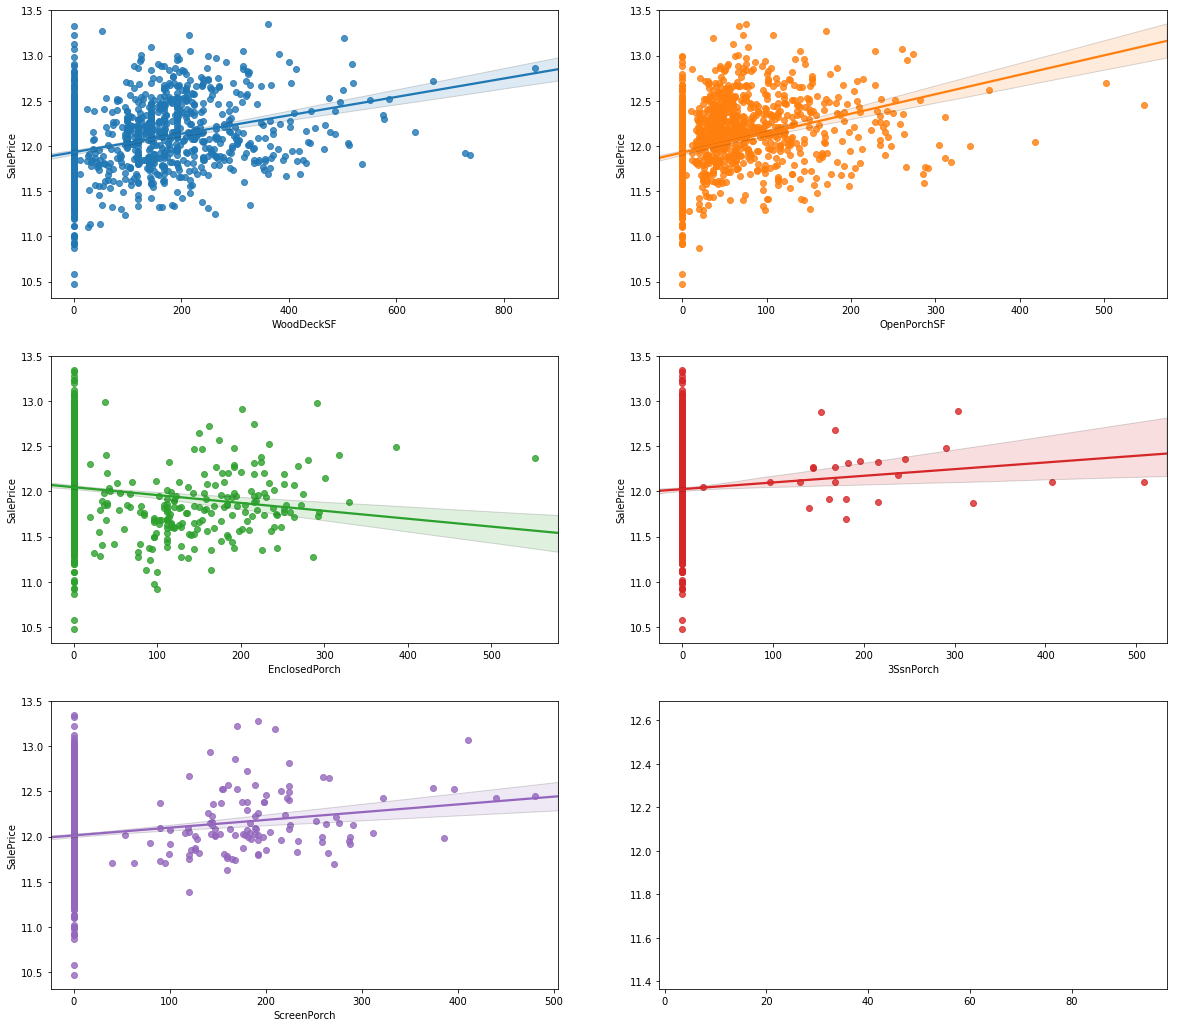

In [145]:
#Set Subplots
fig,axs = plt.subplots(nrows=3,ncols=2,figsize=(20,18))

ax = sns.regplot(x='WoodDeckSF',y='SalePrice',data=combined,ax=axs[0,0])
ax = sns.regplot(x='OpenPorchSF',y='SalePrice',data=combined,ax=axs[0,1])
ax = sns.regplot(x='EnclosedPorch',y='SalePrice',data=combined,ax=axs[1,0])
ax = sns.regplot(x='3SsnPorch',y='SalePrice',data=combined,ax=axs[1,1])
ax = sns.regplot(x='ScreenPorch',y='SalePrice',data=combined,ax=axs[2,0])

plt.show()

There are many various Porch related area features. Can these be combined in a single Porch Area?

In [146]:
#Combine all Porch areas into one new feature
combined['PorchArea'] = combined['WoodDeckSF']+combined['OpenPorchSF']+combined['EnclosedPorch']+combined['3SsnPorch']+combined['ScreenPorch']

In [147]:
combined[['LotFrontage','LotArea','BsmtUnfSF','1stFlrSF','2ndFlrSF','GrLivArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PorchArea','GarageArea','SalePrice']].corr()

LotFrontage   LotArea  BsmtUnfSF  1stFlrSF  2ndFlrSF  \
LotFrontage       1.000000  0.649247   0.104728  0.422420  0.013047   
LotArea           0.649247  1.000000   0.058433  0.416784  0.052820   
BsmtUnfSF         0.104728  0.058433   1.000000  0.304801 -0.001725   
1stFlrSF          0.422420  0.416784   0.304801  1.000000 -0.275981   
2ndFlrSF          0.013047  0.052820  -0.001725 -0.275981  1.000000   
GrLivArea         0.341060  0.372191   0.240728  0.540634  0.654436   
WoodDeckSF        0.121915  0.196980  -0.038015  0.223155  0.086548   
OpenPorchSF       0.149090  0.156739   0.122690  0.230242  0.182721   
EnclosedPorch     0.031468  0.051720   0.006754 -0.062305  0.056057   
3SsnPorch         0.042256  0.031430  -0.005684  0.046210 -0.032612   
ScreenPorch       0.070938  0.101963  -0.048584  0.103353  0.011974   
PorchArea         0.203317  0.283315   0.005901  0.291701  0.166573   
GarageArea        0.338875  0.305040   0.167243  0.482642  0.120993   
SalePrice         0.361489  0.387994   0.235259  0.617771  0.311237   

               GrLivArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
LotFrontage     0.341060    0.121915     0.149090       0.031468   0.042256   
LotArea         0.372191    0.196980     0.156739       0.051720   0.031430   
BsmtUnfSF       0.240728   -0.038015     0.122690       0.006754  -0.005684   
1stFlrSF        0.540634    0.223155     0.230242      -0.062305   0.046210   
2ndFlrSF        0.654436    0.086548     0.182721       0.056057  -0.032612   
GrLivArea       1.000000    0.248237     0.338692       0.007568   0.007389   
WoodDeckSF      0.248237    1.000000     0.038127      -0.117872  -0.003903   
OpenPorchSF     0.338692    0.038127     1.000000      -0.062506  -0.009254   
EnclosedPorch   0.007568   -0.117872    -0.062506       1.000000  -0.032849   
3SsnPorch       0.007389   -0.003903    -0.009254      -0.032849   1.000000   
ScreenPorch     0.091865   -0.052110     0.049452      -0.064212  -0.029799   
PorchArea       0.374844    0.740535     0.439517       0.255368   0.127944   
GarageArea      0.477727    0.232576     0.233546      -0.106373   0.029728   
SalePrice       0.726270    0.329276     0.359190      -0.137978   0.056525   

               ScreenPorch  PorchArea  GarageArea  SalePrice  
LotFrontage       0.070938   0.203317    0.338875   0.361489  
LotArea           0.101963   0.283315    0.305040   0.387994  
BsmtUnfSF        -0.048584   0.005901    0.167243   0.235259  
1stFlrSF          0.103353   0.291701    0.482642   0.617771  
2ndFlrSF          0.011974   0.166573    0.120993   0.311237  
GrLivArea         0.091865   0.374844    0.477727   0.726270  
WoodDeckSF       -0.052110   0.740535    0.232576   0.329276  
OpenPorchSF       0.049452   0.439517    0.233546   0.359190  
EnclosedPorch    -0.064212   0.255368   -0.106373  -0.137978  
3SsnPorch        -0.029799   0.127944    0.029728   0.056525  
ScreenPorch       1.000000   0.302675    0.063035   0.125094  
PorchArea         0.302675   1.000000    0.265911   0.414728  
GarageArea        0.063035   0.265911    1.000000   0.656497  
SalePrice         0.125094   0.414728    0.656497   1.000000

PorchArea seems to have better correlation with SalePrice so we'll keep this feature!

__Basement Related Areas__

There are also many different Basement areas and characteristics!

Other than the numerical features, the Dataset also includes information regarding the quality of these Basement Areas. This seems like an important combination of features to explore:
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
       
BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

Perhaps this quality will directly influence the impact of Basement area? Let's explore!

In [148]:
combined[['BsmtUnfSF','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','SalePrice']].head()

BsmtUnfSF  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  SalePrice
0      150.0       706.0         0.0      150.0        856.0  12.247699
1      284.0       978.0         0.0      284.0       1262.0  12.109016
2      434.0       486.0         0.0      434.0        920.0  12.317171
3      540.0       216.0         0.0      540.0        756.0  11.849405
4      490.0       655.0         0.0      490.0       1145.0  12.429220

In [149]:
combined[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','SalePrice']].corr()

BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  SalePrice
BsmtFinSF1     1.000000   -0.058366  -0.490528     0.507294   0.379733
BsmtFinSF2    -0.058366    1.000000  -0.236298     0.091971  -0.001685
BsmtUnfSF     -0.490528   -0.236298   1.000000     0.426960   0.235259
TotalBsmtSF    0.507294    0.091971   0.426960     1.000000   0.648786
SalePrice      0.379733   -0.001685   0.235259     0.648786   1.000000

TotalBsmtSF seems to better correlate with the SalePrice variable. This feature is derived from [BsmtFinSF1 + BsmtFinSF2] 

However, let's plot some of these graphs and better analyse the question

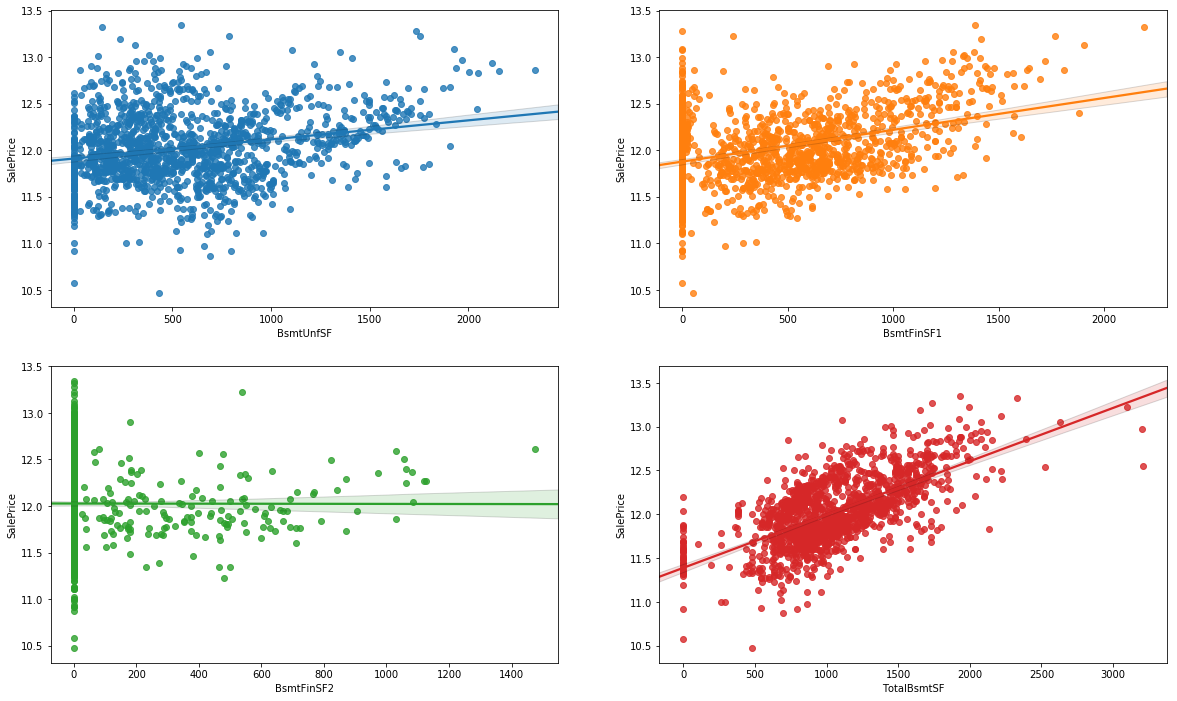

In [150]:
#Set Subplots
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(20,12))

ax = sns.regplot(x='BsmtUnfSF',y='SalePrice',data=combined,ax=axs[0,0])
ax = sns.regplot(x='BsmtFinSF1',y='SalePrice',data=combined,ax=axs[0,1])
ax = sns.regplot(x='BsmtFinSF2',y='SalePrice',data=combined,ax=axs[1,0])
ax = sns.regplot(x='TotalBsmtSF',y='SalePrice',data=combined,ax=axs[1,1])

In [151]:
combined.drop('BsmtFinSF2',axis=1,inplace=True)

__MasVnrArea__

Masonry veneer area in square feet.

Veneer is a building technique and is quite usefull for insulation. As it it built on the walls of the house, it should be directly correlated with the house wall area!

In [152]:
combined['MasVnrArea'].corr(combined['SalePrice'])

0.4333666258775715

This feature seems to have some correlation with the SalePrice. Let's plot it again!

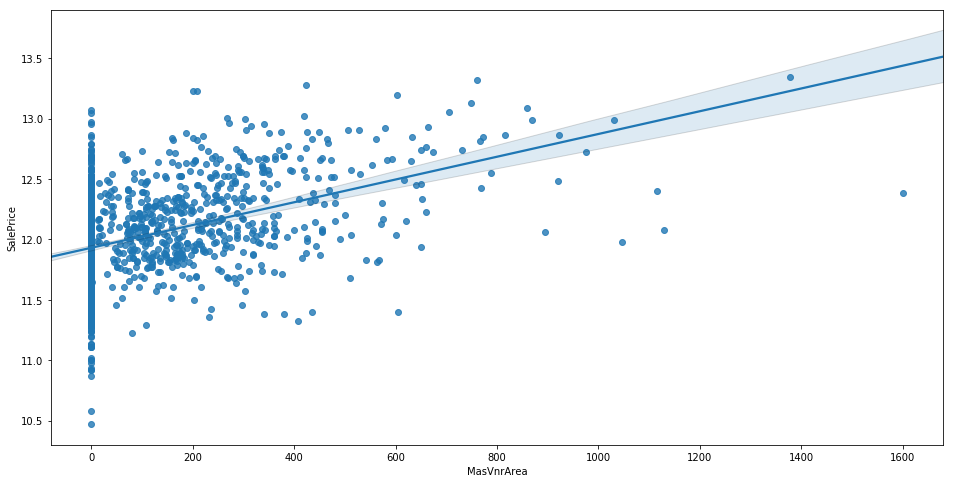

In [153]:
plt.figure(figsize=(16,8))
sns.regplot(x='MasVnrArea',y='SalePrice',data=combined)

__LowQualFinSF__

Low quality finished square feet (all floors)

In [154]:
combined['LowQualFinSF'].corr(combined['SalePrice'])

-0.028853501583616648

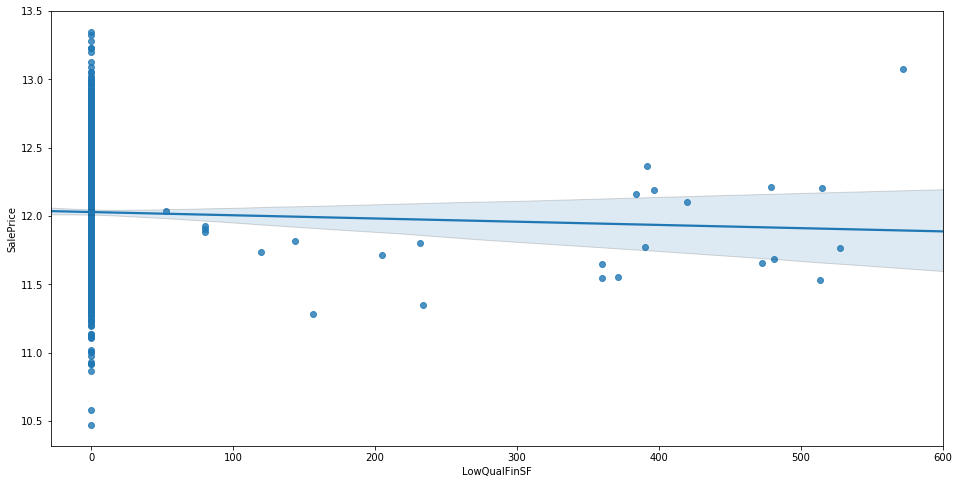

In [155]:
plt.figure(figsize=(16,8))
sns.regplot(x='LowQualFinSF',y='SalePrice',data=combined)
plt.show()

This feature (surprisingly) seems to have very litte correlation with SalePrice! Let's drop it.

In [156]:
combined.drop('LowQualFinSF',axis=1,inplace=True)

__GarageYrBuilt GarageCars GarageArea__

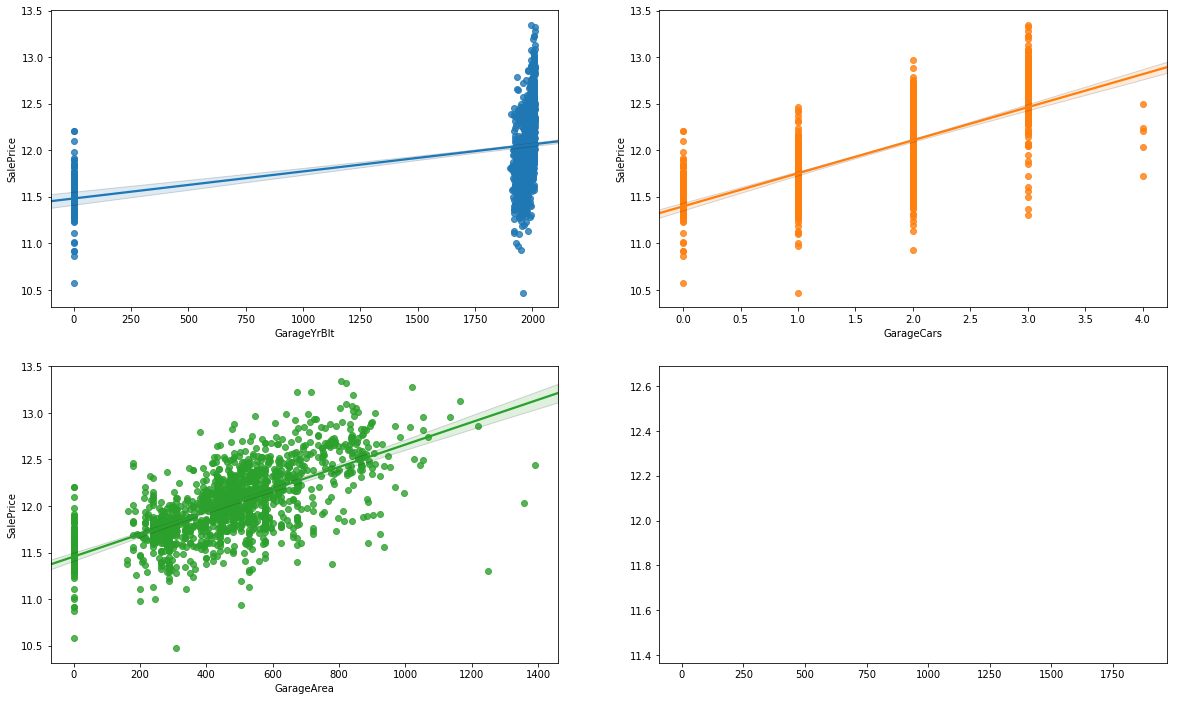

In [157]:
#Set Subplots
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(20,12))

ax = sns.regplot(x='GarageYrBlt',y='SalePrice',data=combined,ax=axs[0,0])
ax = sns.regplot(x='GarageCars',y='SalePrice',data=combined,ax=axs[0,1])
ax = sns.regplot(x='GarageArea',y='SalePrice',data=combined,ax=axs[1,0])

GarageArea and Garage Cars have a similar correlation to SalePrice and also seem to have a very high correlation between them.

This is logical as the larger the garage is, the more cars can be fit into it. GarageCars seems therefore to be redundant and may be dropped.

In [158]:
combined[['GarageArea','GarageCars']].corr()

GarageArea  GarageCars
GarageArea     1.00000     0.89106
GarageCars     0.89106     1.00000

There are several houses without a garage!

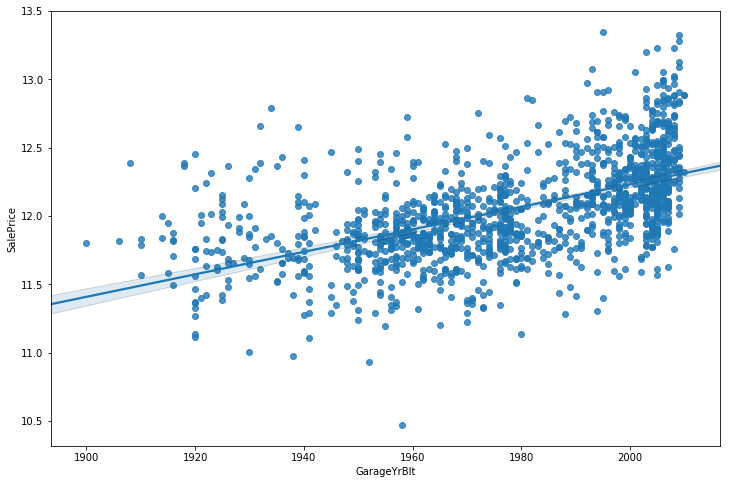

In [159]:
filt = combined['GarageYrBlt'] > 0

plt.figure(figsize=(12,8))
sns.regplot(x=combined[filt]['GarageYrBlt'],y=combined[filt]['SalePrice'])

This feature should be divided into bins, None, Old, Modern.

In [160]:
aux = combined['GarageYrBlt'].copy()

In [161]:
filt = combined['GarageYrBlt'] == 0
aux[filt] = 'None'

In [162]:
filt = ((combined['GarageYrBlt'] < 1990) & (combined['GarageYrBlt'] > 0))
aux[filt] = 'Old'

In [163]:
filt = combined['GarageYrBlt'] >= 1990
aux[filt] = 'Modern'

In [164]:
combined['GarageYrBlt'] = aux

In [165]:
combined[['GarageYrBlt','SalePrice']].groupby('GarageYrBlt').describe()

SalePrice                                                        \
                count       mean       std        min        25%        50%   
GarageYrBlt                                                                   
Modern          592.0  12.290463  0.325565  11.302217  12.080084  12.264346   
None             75.0  11.526303  0.302199  10.579005  11.344519  11.532738   
Old             766.0  11.872130  0.292672  10.471978  11.699413  11.849405   

                                   
                   75%        max  
GarageYrBlt                        
Modern       12.491255  13.345509  
None         11.739998  12.208575  
Old          12.031576  12.861001

In [166]:
combined['GarageYrBlt'].head()

0    Modern
1       Old
2    Modern
3    Modern
4    Modern
Name: GarageYrBlt, dtype: object

In [167]:
mapper = {'None':0,'Old':1,'Modern':2}
combined['GarageYrBlt'] = combined['GarageYrBlt'].replace(mapper)

In [168]:
del aux

__Pool Area__

PoolArea: Pool area in square feet

In [169]:
combined[['PoolArea','SalePrice']].corr()['PoolArea']

PoolArea     1.000000
SalePrice    0.041348
Name: PoolArea, dtype: float64

In [170]:
combined[combined['PoolArea']>0]['PoolArea'].count()

11

It seems there are only 11 houses with Pools!

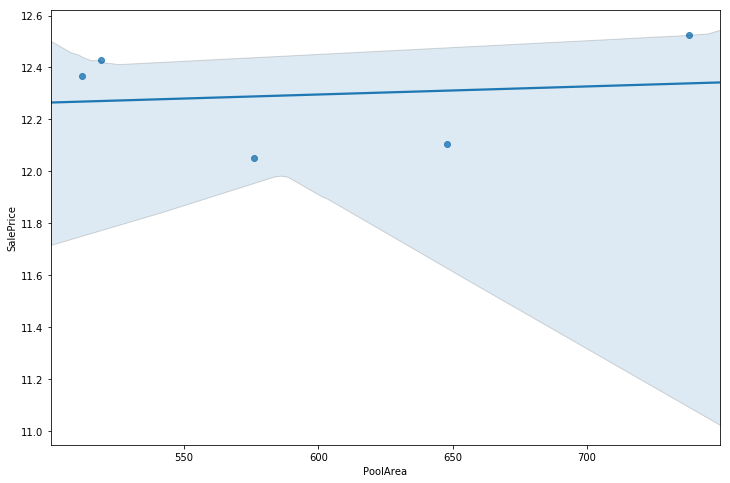

In [171]:
filt = combined['PoolArea'] > 0

plt.figure(figsize=(12,8))
sns.regplot(x=combined[filt]['PoolArea'],y=combined[filt]['SalePrice'])

This feature does not seem to be useful and NoPoll information is already captured in PoolQC, so this will be dropped!

In [172]:
combined.drop('PoolArea',axis=1,inplace=True)

__MiscVal__

MiscVal: $Value of miscellaneous feature

What is this feature? What $value is this and how is it determined? Should it be added to the final SalePrice predictions directly?

In [173]:
combined['MiscVal'].describe()

count     2892.000000
mean        41.791494
std        465.256360
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      17000.000000
Name: MiscVal, dtype: float64

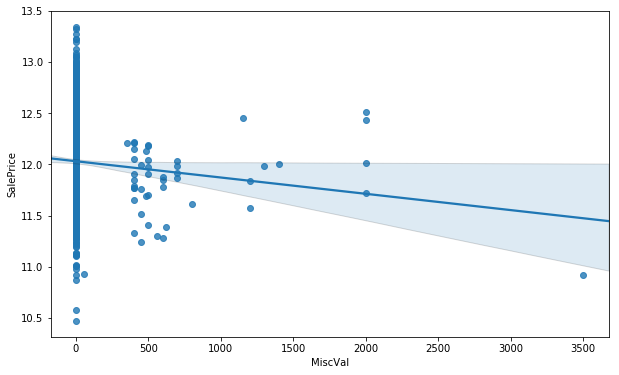

In [174]:
plt.figure(figsize=(10,6))
sns.regplot(x=combined['MiscVal'], y=combined['SalePrice'])

There seem to be (at least) 3 outliers! What does the feature look like without them?

In [175]:
aux = combined[combined['MiscVal'] <3000].copy()

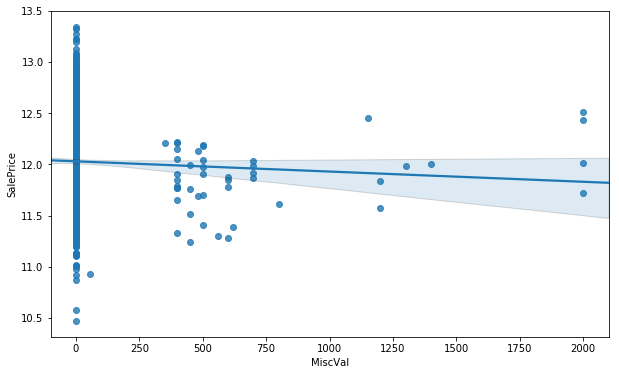

In [176]:
plt.figure(figsize=(10,6))
sns.regplot(x=aux['MiscVal'], y=aux['SalePrice'])

In [177]:
#Delete auxiliary DataFrame
del aux

This feature in numerical form does not seem to be particularly useful. How about in binary form?

In [178]:
combined['aux'] = (combined['MiscVal'] > 0).astype('uint')

In [179]:
combined[['aux','SalePrice']].groupby('aux').describe()

SalePrice                                                        \
        count       mean       std        min        25%        50%   
aux                                                                   
0      1386.0  12.033629  0.385048  10.471978  11.775778  12.012767   
1        47.0  11.826972  0.358415  10.915107  11.671797  11.870607   

                           
           75%        max  
aux                        
0    12.278398  13.345509  
1    12.039128  12.513561

We'll use it in binary form!

In [180]:
combined['MiscVal'] = combined['aux']
combined['MiscVal'].astype('uint8')
combined.drop('aux',axis=1,inplace=True)

__Creating new Features__

Let's create some new features for enriching our dataset. Let's start by refining the areas and room numbers

In [181]:
#Checking the top 10 features correlated with SalePrice
combined.corr()['SalePrice'].sort_values(ascending=False).head(10)

SalePrice      1.000000
OverallQual    0.825597
GrLivArea      0.726270
ExterQual      0.696904
GarageCars     0.681008
KitchenQual    0.677148
BsmtQual       0.658590
GarageArea     0.656497
TotalBsmtSF    0.648786
1stFlrSF       0.617771
Name: SalePrice, dtype: float64

Let's create features with:
 - The full SF area of the house (HouseSF);
 - The total number of bathrooms (considering full bathroom as 1 and halfbathroom as 0.5) (Bathrooms);
 - Several features that combined OverallQual and OverallCond - as OverallScore
 - Features that combine area with Qual into AreaQual

In [182]:
#Calculating HouseSF
combined['HouseSF'] = combined['GrLivArea'] + combined['TotalBsmtSF']

In [183]:
#Calculating total number of bathrooms
combined['Bathrooms'] = combined['FullBath'] + 0.5*combined['HalfBath']+combined['BsmtFullBath']+0.5*combined['BsmtHalfBath']

In [184]:
combined['OverallScore'] = combined['OverallQual'] * combined['OverallCond']
combined['ExterScore'] = combined['ExterQual'] * combined['ExterCond']
combined['KitchenAreaQual'] = combined['KitchenAbvGr'] * combined['KitchenQual']
combined['GarageAreaQual'] = combined['GarageArea'] * combined['GarageQual']

In [185]:
#Checking the top 10 features correlated with SalePrice
combined.corr()['SalePrice'].sort_values(ascending=False).head(10)

SalePrice      1.000000
HouseSF        0.827235
OverallQual    0.825597
GrLivArea      0.726270
ExterQual      0.696904
GarageCars     0.681008
KitchenQual    0.677148
Bathrooms      0.670419
BsmtQual       0.658590
GarageArea     0.656497
Name: SalePrice, dtype: float64

Creating Polynomials

In [186]:
#store the top 10 feature names for a for loop
top_10 = combined.corr()['SalePrice'].sort_values(ascending=False).head(10).index

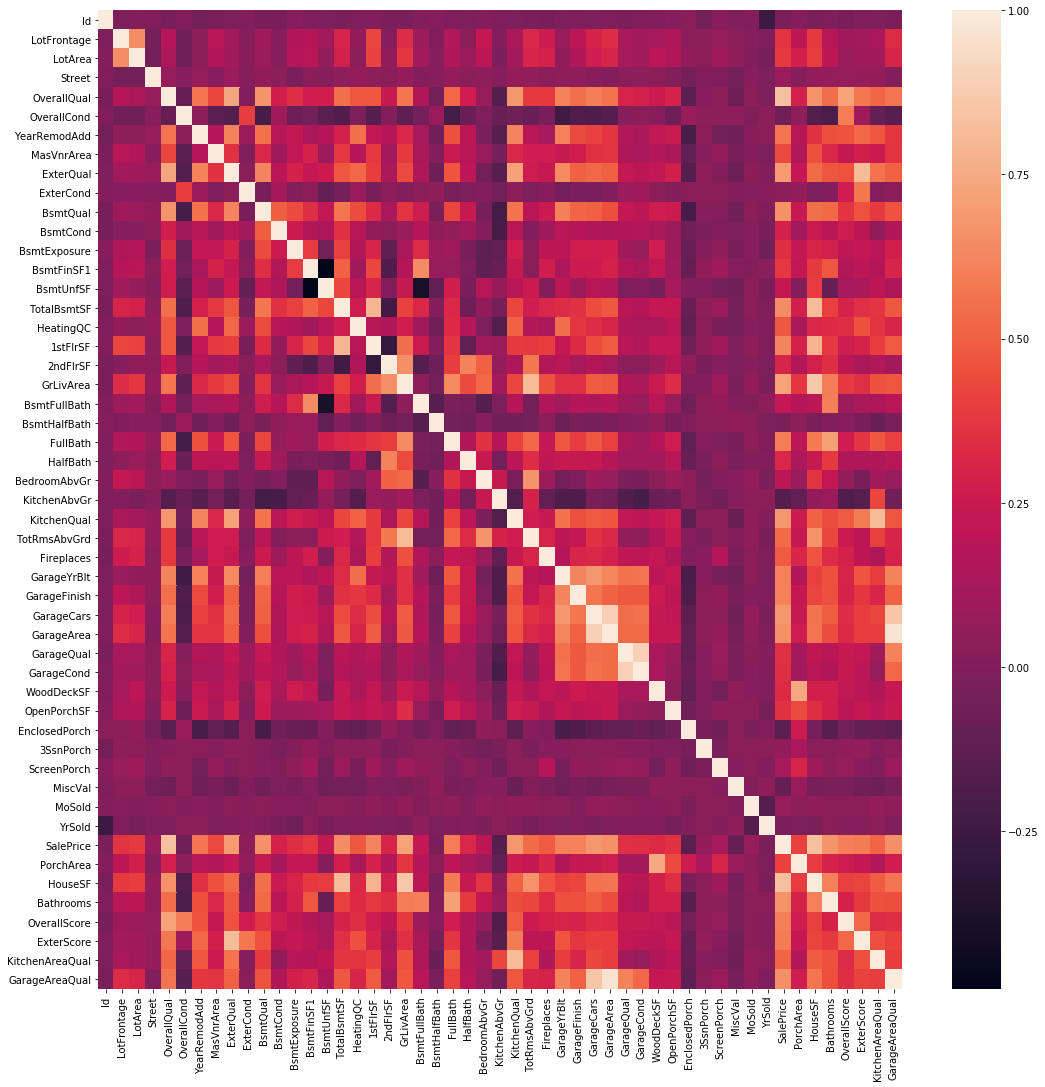

In [187]:
plt.figure(figsize=(18,18))
sns.heatmap(combined.corr())

__Multicolinearity__

Features that are highly correlated with each other are said to be colinear and can pose a challenge for models. Not only do they supply redundant information for the model, but they can make the model ignore other features, less correlated with the target variable but nonetheless important and with predictive value. This is because multicolinearity will increase the standard errors of the coefficients. As the model focuses on reducing overall error, it will be tempted to ignore other, less "significant" features that could have added some value to the result. Therefore, let's use the heatmap to identify multicolinear features and let's delete the less correlated of the pairs.

It seems that MisVal and MiscFeature are highly correlated with each other:

In [188]:
combined[['MiscFeature','MiscVal','SalePrice']].corr()

MiscVal  SalePrice
MiscVal    1.000000  -0.095427
SalePrice -0.095427   1.000000

Neither seems particularly useful but we'll drop MiscVal as it seems to be less useful!

GarageQual and GarageCond:

In [189]:
combined[['GarageQual','GarageCond','SalePrice']].corr()

GarageQual  GarageCond  SalePrice
GarageQual    1.000000    0.900124   0.352759
GarageCond    0.900124    1.000000   0.344644
SalePrice     0.352759    0.344644   1.000000

Let's keep GarageQual!

In [190]:
combined.drop('GarageCond',axis=1,inplace=True)

GarageCars and GarageArea

In [191]:
combined[['GarageCars','GarageArea','SalePrice']].corr()

GarageCars  GarageArea  SalePrice
GarageCars    1.000000    0.891060   0.681008
GarageArea    0.891060    1.000000   0.656497
SalePrice     0.681008    0.656497   1.000000

Let's keep GarageCars!

In [192]:
combined.drop('GarageArea',axis=1,inplace=True)

### Dropping aditional columns

In [193]:
combined.drop(['ExterCond','3SsnPorch','EnclosedPorch'],axis=1,inplace=True)

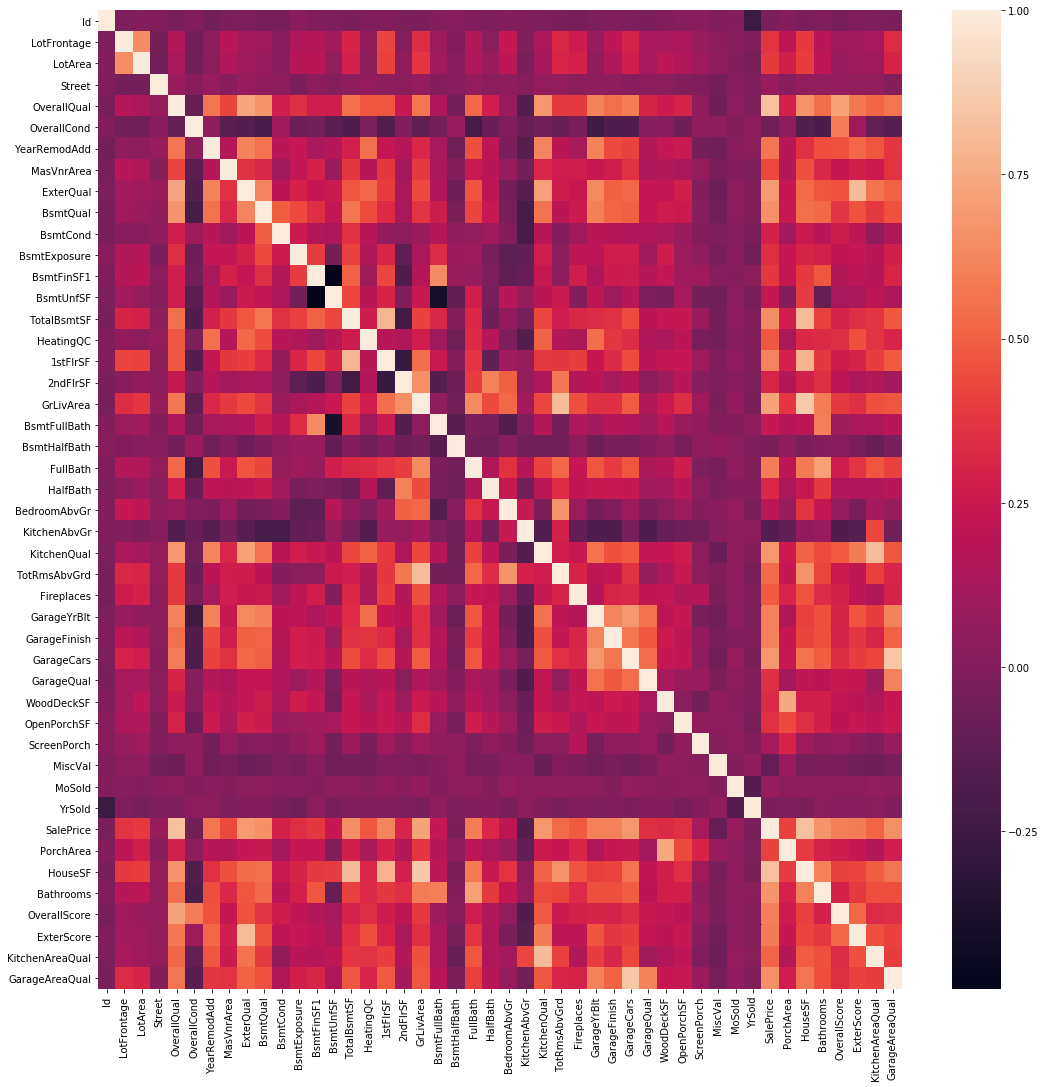

In [194]:
plt.figure(figsize=(18,18))
sns.heatmap(combined.corr())

### Polynomials

One way to try and improve a model's predictive capacity is create polynomial features, that is, quadratic, cubir, sqrt etc. transformations of features.

This can sometime lead to a "better" behaved feature that is better fit by the regression model, increase its performance.

Below is the code that would create polynomials, check if they increased correlation with SalePrice and used it if it did (dropping the original feature in the process).

Unfortunately, while it marginally improves cross-validation error, it marginally worsens the test set error and will therefore be commented out.

<img src="images/Polynomials.png">

In [195]:
top_10 = combined.corr()['SalePrice'].sort_values(ascending=False).head(11).index
DF_poly = combined[top_10]

In [196]:
combined.corr()['SalePrice'].sort_values(ascending=False).head(11)

SalePrice         1.000000
HouseSF           0.827235
OverallQual       0.825597
GrLivArea         0.726270
ExterQual         0.696904
GarageCars        0.681008
KitchenQual       0.677148
Bathrooms         0.670419
BsmtQual          0.658590
GarageAreaQual    0.652460
TotalBsmtSF       0.648786
Name: SalePrice, dtype: float64

In [197]:
#Polynomials
#for i in top_10:
#    if i != 'SalePrice':
#        DF_poly[i+' s2'] = combined[i] ** 2
#        DF_poly[i+' s3'] = combined[i] ** 3
#        DF_poly[i+' sqrt'] = combined[i] ** 0.5
        #Identify the index (column name) of the feature with highest correlation from polynomials/original feature.
#        aux = DF_poly[[i,i+' s2',i+' s3',i+' sqrt','SalePrice']].corr()['SalePrice'].sort_values(ascending=False).index[1]
#        combined.drop(i,axis=1,inplace=True)
#        combined[aux] = DF_poly[aux]

In [198]:
combined.shape

(2892, 78)

### OHE (One Hot Encoding)

Categorical features will need to be One Hot Encoded to be used by the models. 

One Hot Encoding is a technique whereby 1 feature with n possible categories is converted into n features that can be either 1 (in case the category corresponds to the specific sample) or 0.

In [199]:
categorical = [i for i in combined.columns if ((combined.dtypes[i].name == 'object') or (combined.dtypes[i].name == 'category'))]

In [200]:
#OHE
combined = pd.get_dummies(combined,columns=categorical)

In [201]:
combined.shape

(2892, 282)

XGBoost does not deal well with characters such as [,],| > or <. Therefore, these will be removed from the feature names!

In [202]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)

In [203]:
combined.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in combined.columns.values]

__MSSubClass OHE__

In [204]:
combined[['MSSubClass_20','MSSubClass_30','MSSubClass_40','MSSubClass_45',\
                          'MSSubClass_50','MSSubClass_60','MSSubClass_70','MSSubClass_75',\
                          'MSSubClass_80','MSSubClass_85','MSSubClass_90','MSSubClass_120',\
                          'MSSubClass_150','MSSubClass_160','MSSubClass_180','MSSubClass_190','SalePrice']].corr()['SalePrice']

MSSubClass_20     0.056215
MSSubClass_30    -0.321366
MSSubClass_40    -0.021456
MSSubClass_45    -0.106690
MSSubClass_50    -0.174903
MSSubClass_60     0.405252
MSSubClass_70    -0.025743
MSSubClass_75     0.010451
MSSubClass_80    -0.002673
MSSubClass_85    -0.040400
MSSubClass_90    -0.126131
MSSubClass_120    0.095382
MSSubClass_150         NaN
MSSubClass_160   -0.122119
MSSubClass_180   -0.114122
MSSubClass_190   -0.116589
SalePrice         1.000000
Name: SalePrice, dtype: float64

In [205]:
combined.drop(['MSSubClass_20','MSSubClass_40','MSSubClass_45',\
                          'MSSubClass_50','MSSubClass_70','MSSubClass_75',\
                          'MSSubClass_80','MSSubClass_85','MSSubClass_90','MSSubClass_120',\
                          'MSSubClass_150','MSSubClass_160','MSSubClass_180','MSSubClass_190'],axis=1,inplace=True)

### Normalizing Features

Previously, we have checked the SalePrice distribution and its skewdness. Let's repeat the analysis, but for all features!

Skewnewss quantifies how symmetrical the distribution is:
- Skeweness < -1 or > 1: Highly skewed;
- Skeweness [-1, -0.5[ or ]0.5, 1]: Moderately skewed;
- Skeweness [-0.5, 0.5]

Source: https://help.gooddata.com/display/doc/Normality+Testing+-+Skewness+and+Kurtosis

In [206]:
#Let's list numerical values by skewedness
skew = combined.select_dtypes(['float64','int64']).drop(['SalePrice','Id'],axis=1).skew().sort_values(ascending=False)
skew

ScreenPorch       3.929173
LotArea           3.168891
MasVnrArea        2.603497
OpenPorchSF       2.471875
WoodDeckSF        1.838819
PorchArea         1.382334
1stFlrSF          1.264642
LotFrontage       1.084498
GrLivArea         0.982720
BsmtFinSF1        0.978739
HouseSF           0.949503
BsmtUnfSF         0.921743
2ndFlrSF          0.838264
TotalBsmtSF       0.667860
OverallCond       0.577066
Bathrooms         0.486112
GarageAreaQual    0.454648
OverallScore      0.236050
MoSold            0.197582
OverallQual       0.186393
YrSold            0.132569
GarageCars       -0.213786
GarageYrBlt      -0.251863
dtype: float64

In [207]:
#Let's normalize all features with moderate or high skeweness (> 0.5 or <-0.5)
list_skewed = skew[abs(skew)>0.5].index
list_skewed.shape

(15,)

__Box Cox Tranformation:__

Box Cox transformation is used to approximate non-normal features to normal ones. 

It works by applying the following formula, where lambda can be any value from -5 to 5:

<img src="images/Box Cox Formula.png">

As values must be positive, all features to be scaled will be increased by 1. This will be of little consequence as all features will be scaled afterwards, eliminating this transformation.

In [208]:
combined.head()

Id  LotFrontage  LotArea  Street  OverallQual  OverallCond  YearRemodAdd  \
0   1         65.0     8450       1            7            5             5   
1   2         80.0     9600       1            6            8             2   
2   3         68.0    11250       1            7            5             5   
3   4         60.0     9550       1            7            5             1   
4   5         84.0    14260       1            8            5             4   

   MasVnrArea  ExterQual  BsmtQual  BsmtCond  BsmtExposure  BsmtFinSF1  \
0       196.0          3         4         3             1       706.0   
1         0.0          2         4         3             4       978.0   
2       162.0          3         4         3             2       486.0   
3         0.0          2         3         4             1       216.0   
4       350.0          3         4         3             3       655.0   

   BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  GrLivArea  \
0      150.0        856.0          4       856       854       1710   
1      284.0       1262.0          4      1262         0       1262   
2      434.0        920.0          4       920       866       1786   
3      540.0        756.0          3       961       756       1717   
4      490.0       1145.0          4      1145      1053       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   KitchenQual  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageFinish  \
0            3             8           0            2             2   
1            2             6           1            1             2   
2            3             6           1            2             2   
3            3             7           1            2             1   
4            3             9           1            2             2   

   GarageCars  GarageQual  WoodDeckSF  OpenPorchSF  ScreenPorch  MiscVal  \
0         2.0           2           0           61            0        0   
1         2.0           2         298            0            0        0   
2         2.0           2           0           42            0        0   
3         3.0           2           0           35            0        0   
4         3.0           2         192           84            0        0   

   MoSold  YrSold  SalePrice  PorchArea  HouseSF  Bathrooms  OverallScore  \
0       2    2008  12.247699         61   2566.0        3.5            35   
1       5    2007  12.109016        298   2524.0        2.5            48   
2       9    2008  12.317171         42   2706.0        3.5            35   
3       2    2006  11.849405        307   2473.0        2.0            35   
4      12    2008  12.429220        276   3343.0        3.5            40   

   ExterScore  KitchenAreaQual  GarageAreaQual  MSSubClass_30  MSSubClass_60  \
0           6                3          1096.0              0              1   
1           4                2           920.0              0              0   
2           6                3          1216.0              0              1   
3           4                3          1284.0              0              0   
4           6                3          1672.0              0              1   

   MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0                 0            0            0            1            0   
1                 0            0            0            1            0   
2                 0            0            0            1            0   
3                 0            0         

In [209]:
print("There are {} skewed numerical features to Box Cox transform".format(skew.shape[0]))

from scipy.stats import boxcox
#lam = 0.15
for feature in list_skewed:
    #all_data[feat] += 1
    combined[feature],_ = boxcox(combined[feature]+1)

There are 23 skewed numerical features to Box Cox transform


### Scaling of features

For adequate model performance it is important that all features are scaled to make sure mean is 0 and variance of 1.

To ensure it, a scaling tool from Sklearn will be used. 

RobustScaler is a scaling method that centers data on the median instead of the mean and uses interquantile range [0.25 to 0.75] for scale instead of variance. This is a more robust method to outliers than a StandardScaler.

In [210]:
scaler = RobustScaler(with_centering=True,with_scaling=True)

In [211]:
#To make sure the scaled dataframes are dataframes and not arrays, the column names will be stored and fed on the scaler operation below
columns = combined.columns
comb_id = combined['Id']
y = combined[combined['Id']<= 1460]['SalePrice']
combined.drop('SalePrice',axis=1,inplace=True)

In [212]:
id_list = combined[combined['Id']> 1460]['Id']
#To make sure the scaled dataframes are dataframes and not arrays, the column names will be stored and fet on the scaler operation below
columns = combined.columns      

In [213]:
combined[columns] = scaler.fit_transform(combined[columns])
combined['Id'] = comb_id  

In [214]:
combined.head()

Id  LotFrontage   LotArea  Street  OverallQual  OverallCond  YearRemodAdd  \
0   1    -0.253312 -0.249620     0.0          0.5     0.000000          0.25   
1   2     0.485205  0.040906     0.0          0.0     2.815669         -0.50   
2   3    -0.100399  0.418896     0.0          0.5     0.000000          0.25   
3   4    -0.514795  0.028783     0.0          0.5     0.000000         -0.75   
4   5     0.672189  1.020774     0.0          1.0     0.000000          0.00   

   MasVnrArea  ExterQual  BsmtQual  BsmtCond  BsmtExposure  BsmtFinSF1  \
0    1.016712        1.0       0.0       0.0           0.0    0.175220   
1    0.000000        0.0       0.0       0.0           3.0    0.273126   
2    0.999281        1.0       0.0       0.0           1.0    0.071623   
3    0.000000        0.0      -1.0       1.0           0.0   -0.125096   
4    1.064860        1.0       0.0       0.0           2.0    0.153704   

   BsmtUnfSF  TotalBsmtSF  HeatingQC  1stFlrSF  2ndFlrSF  GrLivArea  \
0  -0.701269    -0.267881        0.0 -0.513594  1.018103   0.390840   
1  -0.352503     0.533102        0.0  0.338855  0.000000  -0.306481   
2  -0.055809    -0.136973        0.0 -0.354555  1.019393   0.491424   
3   0.121711    -0.476733       -0.5 -0.258540  1.006733   0.400281   
4   0.040532     0.308848        0.0  0.126069  1.037216   0.974220   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0           1.0           0.0       0.0       1.0           0.0           0.0   
1           0.0           1.0       0.0       0.0           0.0           0.0   
2           1.0           0.0       0.0       1.0           0.0           0.0   
3           1.0           0.0      -1.0       0.0           0.0           0.0   
4           1.0           0.0       0.0       1.0           1.0           0.0   

   KitchenQual  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageFinish  \
0          1.0           1.0        -1.0          1.0           0.0   
1          0.0           0.0         0.0          0.0           0.0   
2          1.0           0.0         0.0          1.0           0.0   
3          1.0           0.5         0.0          1.0          -1.0   
4          1.0           1.5         0.0          1.0           0.0   

   GarageCars  GarageQual  WoodDeckSF  OpenPorchSF  ScreenPorch  MiscVal  \
0         0.0         0.0    0.000000     0.197429          0.0      0.0   
1         0.0         0.0    1.088064    -0.769317          0.0      0.0   
2         0.0         0.0    0.000000     0.108143          0.0      0.0   
3         1.0         0.0    0.000000     0.065047          0.0      0.0   
4         1.0         0.0    1.020855     0.274989          0.0      0.0   

   MoSold  YrSold  PorchArea   HouseSF  Bathrooms  OverallScore  ExterScore  \
0   -1.00     0.0  -0.541883  0.114405        1.5           0.0         1.0   
1   -0.25    -0.5   0.453455  0.072654        0.5           1.3         0.0   
2    0.75     0.0  -0.692754  0.250399        1.5           0.0         1.0   
3   -1.00    -1.0   0.479320  0.021335        0.0           0.0         0.0   
4    1.50     0.0   0.388277  0.816538        1.5           0.5         1.0   

   KitchenAreaQual  GarageAreaQual  MSSubClass_30  MSSubClass_60  \
0              0.0        0.264901            0.0            1.0   
1             -1.0       -0.068117            0.0            0.0   
2              0.0        0.491958            0.0            1.0   
3              0.0        0.620624            0.0            0.0   
4              0.0        1.354778            0.0            1.0   

   MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0               0.0          0.0          0.0          0.0          0.0   
1               0.0          0.0          0.0          0.0          0.0   
2               0.0          0.0          0.0          0.0          0.0   
3               0.0          0.0          0.0          0.0          0.0   
4               0.0 

### Numerical Features

The combined DataFrame will now be subdivided again into Train and Test sets for Model Training and predicting.

In [215]:
final_train = combined[combined['Id']<= 1460]
final_test = combined[combined['Id']> 1460]#.drop('SalePrice',axis=1)

In [216]:
#Prepare X from Train Set
X_train = final_train.drop(['Id'],axis=1)
final_test.drop('Id',axis=1,inplace=True)

C:\Users\migue\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


## Model Training

In [217]:
#Prepare a DataFrame for storing the results of the various models
scores_df = pd.DataFrame(index=['RMSE'],columns=['Lasso','Elastic Net','Kernel Ridge','Gradient Boosting','XGBoost','LightGBM'])

In [218]:
kfold = KFold(n_splits=10, random_state= 101, shuffle = True)

In [219]:
#Determine score for the supplied model
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = kfold))
    return(rmse.mean())

In [220]:
def store_rmse (rmse,model_str):
    scores_df[model_str] = rmse

__Lasso Regression__

Let's start by running a GridSearch and determine the best Hyperparameters.

In [221]:
#Grid Search for Hyperparameters
#parameter_candidates = [{'alpha': [0,0.0001,0.00025,0.0005,0.00075,0.001,0.0025,0.005,0.0075,0.01,0.025,0.05,0.075,0.1]}]

# Create a classifier object with the classifier and parameter candidates
#clf = GridSearchCV(estimator=Lasso(), param_grid=parameter_candidates, n_jobs=-1,cv=10,scoring='neg_mean_squared_error')

# Train the classifier on data1's feature and target data
#clf.fit(X_train, y) 

# View the best parameters for the model found using grid search
#print('Best Alpha:',clf.best_estimator_.alpha) 

# Results: Best Alpha: 0.0005

In [222]:
lasso = Lasso(alpha =0.0005, random_state=1,max_iter=100000)

__Kernel Ridge Regression__

Let's start by running a GridSearch and determine the best Hyperparameters.

In [223]:
#Grid Search for Hyperparameters
#parameter_candidates = [{'alpha': [0.01,0.05,0.1,0.2,0.3],\
#                        'kernel':['linear','polynomial'],'degree':[1,2,3],'coef0':[0,1,2,3,4,5,6,7,8,9,10,15,20]}]

# Create a classifier object with the classifier and parameter candidates
#clf = GridSearchCV(estimator=KernelRidge(), param_grid=parameter_candidates, n_jobs=-1,cv=10,scoring='neg_mean_squared_error')

# Train the classifier on data1's feature and target data
#clf.fit(X_train, y) 

# View the best parameters for the model found using grid search
#print('Best Alpha:',clf.best_estimator_.alpha) 
#print('Best kernel:',clf.best_estimator_.kernel) 
#print('Best degree:',clf.best_estimator_.degree) 
#print('Best coef0:',clf.best_estimator_.coef0) 

#Best Alpha: 0.1
#Best kernel: polynomial
#Best degree: 2
#Best coef0: 1

In [224]:
kr = KernelRidge(alpha=0.1, kernel='polynomial', degree=2, coef0=2)

__Elastic Net Regression__

Let's start by running a GridSearch and determine the best Hyperparameters.

In [225]:
#Grid Search for Hyperparameters
#parameter_candidates = [{'alpha': [0,0.0001,0.0005,0.001,0.005,0.01,0.05,0.1,0.5,1],'l1_ratio': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.2,1.4,1.6,1.8,2]}]

# Create a classifier object with the classifier and parameter candidates
#clf = GridSearchCV(estimator=ElasticNet(), param_grid=parameter_candidates, n_jobs=-1,cv=10,scoring='neg_mean_squared_error')

# Train the classifier on data1's feature and target data
#clf.fit(X_train, y) 

# View the best parameters for the model found using grid search
#print('Best alpha:',clf.best_estimator_.alpha) 
#print('Best l1_ratio:',clf.best_estimator_.l1_ratio)

# Results: Best alpha: 0.0005
# Results: Best l1_ratio: 1

In [226]:
en = ElasticNet(alpha=0.0005, l1_ratio=0.5, random_state=3,max_iter=100000)

__Gradient Boosting Regressor__

In [227]:
gboost = GradientBoostingRegressor(max_depth=4, n_estimators=150)

__XGBoost__

In [228]:
xgb = xgboost.XGBRegressor(max_depth=5, n_estimators=400)

__LightGBM__

Let's start by running a GridSearch and determine the best Hyperparameters.

In [229]:
#Grid Search for Hyperparameters
#parameter_candidates = [{'objective': ['regression'],'num_leaves': [2,3,4],'learning_rate':[0.05],'n_estimators':[720],'max_bin':[55],\
#                         'bagging_fraction':[0.2,0.4,0.6,0.8],'bagging_freq':[3,5,7],'feature_fraction':[0.1,0.2,0.3],'feature_fraction_seed':[9],\
#                         'bagging_seed':[9],'min_data_in_leaf':[6],'min_sum_hessian_in_leaf':[9,11]}]

# Create a classifier object with the classifier and parameter candidates
#clf = GridSearchCV(estimator=lgbm.LGBMRegressor(), param_grid=parameter_candidates, n_jobs=-1,cv=10,scoring='neg_mean_squared_error')

# Train the classifier on data1's feature and target data
#clf.fit(X_train, y) 

# View the best parameters for the model found using grid search
#print('Best objective:',clf.best_estimator_.objective) 
#print('Best num_leaves:',clf.best_estimator_.num_leaves)
#print('Best learning_rate:',clf.best_estimator_.learning_rate)
#print('Best n_estimators:',clf.best_estimator_.n_estimators)
#print('Best max_bin:',clf.best_estimator_.max_bin)
#print('Best bagging_fraction:',clf.best_estimator_.bagging_fraction)
#print('Best bagging_freq:',clf.best_estimator_.bagging_freq)
#print('Best feature_fraction:',clf.best_estimator_.feature_fraction)
#print('Best feature_fraction_seed:',clf.best_estimator_.feature_fraction_seed)
#print('Best bagging_seed:',clf.best_estimator_.bagging_seed)
#print('Best min_data_in_leaf:',clf.best_estimator_.min_data_in_leaf)
#print('Best min_sum_hessian_in_leaf:',clf.best_estimator_.min_sum_hessian_in_leaf)

#Best objective: regression
#Best num_leaves: 4
#Best learning_rate: 0.05
#Best n_estimators: 720
#Best max_bin: 55
#Best bagging_fraction: 0.6
#Best bagging_freq: 5
#Best feature_fraction: 0.2
#Best feature_fraction_seed: 9
#Best bagging_seed: 9
#Best min_data_in_leaf: 6
#Best min_sum_hessian_in_leaf: 9

In [230]:
#lgb = lgbm.LGBMRegressor(objective='regression',num_leaves=5,
#                              learning_rate=0.05, n_estimators=720,
#                              max_bin = 55, bagging_fraction = 0.8,
#                              bagging_freq = 5, feature_fraction = 0.2319,
#                              feature_fraction_seed=9, bagging_seed=9,
#                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

lgb = lgbm.LGBMRegressor(objective='regression',num_leaves=4,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.6,
                              bagging_freq = 5, feature_fraction = 0.2,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 9)

In [231]:
#Prepare a list for storing in Scores DataFrame

lst_models = ['Lasso','Elastic Net','Kernel Ridge','Gradient Boosting','XGBoost','LightGBM']
dict_models = {'Lasso':lasso,'Kernel Ridge':kr,'Elastic Net':en,'Gradient Boosting':gboost,'XGBoost':xgb,'LightGBM':lgb}
#Temporary list for faster training and cross validation
#lst_models = ['Elastic Net']
#dict_models = {'Elastic Net':en}

In [232]:
for i in lst_models:
    rmse = rmse_cv(dict_models[i])
    store_rmse (rmse,i)

In [233]:
scores_df

Lasso  Elastic Net  Kernel Ridge  Gradient Boosting   XGBoost  \
RMSE  0.09565     0.095277      0.092846           0.105819  0.104144   

      LightGBM  
RMSE  0.101096

			Lasso	   Elastic Net	 Kernel Ridge	Gradient Boosting   XGBoost		 LightGBM
	RMSE	0.09565	0.095277		0.092846		0.105819			0.104144		0.101096

### Predicting values

In [234]:
#Function to calculate RMSE
def rmsle(y, pred):
    return np.sqrt(mean_squared_error(y, pred))

In [235]:
lgb.fit(X_train,y)
kr.fit(X_train,y)
#en.fit(X_train,y)
#xgb.fit(X_train,y)

KernelRidge(alpha=0.1, coef0=2, degree=2, gamma=None, kernel='polynomial',
      kernel_params=None)

In [236]:
#Get data for Learning Curve
train_sizes, train_scores, test_scores = learning_curve(en,X_train,y,cv=10,scoring='neg_mean_squared_error',n_jobs=-1,train_sizes=np.linspace(0.2, 1, 10))
#train_sizes, train_scores, test_scores = learning_curve(kr,X_train,y,cv=10,scoring='neg_mean_squared_error',n_jobs=-1,train_sizes=np.linspace(0.2, 1, 10))
#train_sizes, train_scores, test_scores = learning_curve(gboost,X_train,y,cv=10,scoring='neg_mean_squared_error',n_jobs=-1,train_sizes=np.linspace(0.2, 1, 10))
#train_sizes, train_scores, test_scores = learning_curve(xgb,X_train,y,cv=10,scoring='neg_mean_squared_error',n_jobs=-1,train_sizes=np.linspace(0.2, 1, 10))
#train_sizes, train_scores, test_scores = learning_curve(lgb,X_train,y,cv=10,scoring='neg_mean_squared_error',n_jobs=-1,train_sizes=np.linspace(0.2, 1, 10))

In [237]:
train_mean = np.mean(np.sqrt(-train_scores), axis=1)
train_std = np.std(np.sqrt(-train_scores), axis=1)

test_mean = np.mean(np.sqrt(-test_scores), axis=1)
test_std = np.std(np.sqrt(-test_scores), axis=1)

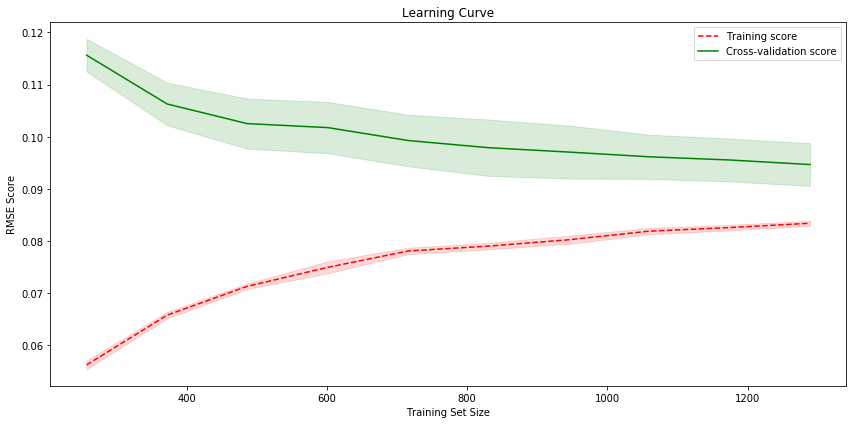

In [238]:
#Draw learning curve plot

# Draw lines
plt.figure(figsize=(12,6))
plt.plot(train_sizes, train_mean, '--', color='red',  label='Training score')
plt.plot(train_sizes, test_mean, color='green', label='Cross-validation score')

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='red',alpha=0.15)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green',alpha=0.15)

# Create plot
plt.title('Learning Curve')
plt.xlabel('Training Set Size'), plt.ylabel('RMSE Score'), plt.legend(loc='best')
plt.tight_layout()
plt.show()

### Ensemble

One way to try and improve the results is to use "the wisdom of the crowds", an Ensemble.

An ensemble is a collection of weak learners, which can together, form a stronger model. This is because some models are better at predicting some results than others and averaging can often produce a better result.

In this section, the various models will be used for predicting values and storing these in DataFrames for later identifying the best ensemble combination possible.

In [239]:
ensemble_train_DF=pd.DataFrame(columns=['Lasso','Kernel Ridge','Elastic Net','Gradient Boosting','XGBoost','LGBM'])
predictions_DF=pd.DataFrame(columns=['Lasso','Kernel Ridge','Elastic Net','Gradient Boosting','XGBoost','LGBM'])

In [240]:
kfold = KFold(n_splits=10, random_state= 101, shuffle = True)

Training

In [241]:
for train, test in kfold.split(X_train,y):

    x_temp = X_train.iloc[train]
    y_temp = y.iloc[train]
    
    #fit and predict with Lasso
    lasso.fit(x_temp,y_temp)
    y_train_lasso = lasso.predict(X_train.iloc[test])
        
    #fit and predict with Kernel Ridge Regression
    kr.fit(x_temp,y_temp)
    y_train_kr = kr.predict(X_train.iloc[test])

    #fit and predict with Elastic Net Regression
    en.fit(x_temp,y_temp)
    y_train_en = en.predict(X_train.iloc[test])   
    
    #fit and predict with Gboost
    gboost.fit(x_temp,y_temp)
    y_train_gboost = gboost.predict(X_train.iloc[test])
    
    #fit and predict with XGBoost
    xgb.fit(x_temp,y_temp)
    y_train_xgb = xgb.predict(X_train.iloc[test])

    #fit and predict with LGBM
    lgb.fit(x_temp,y_temp)
    y_train_lgb = lgb.predict(X_train.iloc[test])
    
    temp_DF = pd.DataFrame()
    temp_DF['Lasso'] = y_train_lasso
    temp_DF['Kernel Ridge'] = y_train_kr
    temp_DF['Elastic Net'] = y_train_en
    temp_DF['Gradient Boosting'] = y_train_gboost
    temp_DF['XGBoost'] = y_train_xgb
    temp_DF['LGBM'] = y_train_lgb
    
    ensemble_train_DF = pd.concat((ensemble_train_DF,temp_DF))

In [242]:
ensemble_train_DF = ensemble_train_DF.sort_index()

In [243]:
ensemble_train_DF_copy = ensemble_train_DF.copy()

In [244]:
columns = ensemble_train_DF_copy.columns

In [245]:
ensemble_train_DF_copy.head()

Lasso  Kernel Ridge  Elastic Net  Gradient Boosting    XGBoost  \
0  12.257391     12.259476    12.256957          12.248063  12.263806   
0  12.317364     12.309397    12.323018          12.311797  12.333433   
0  11.821761     11.821039    11.800525          11.799182  11.763165   
0  11.706648     11.681571    11.694676          11.717299  11.785444   
0  12.080307     12.080672    12.060939          12.116500  12.136553   

        LGBM  
0  12.237815  
0  12.279111  
0  11.808148  
0  11.734312  
0  12.077131

In [246]:
lasso_meta = Lasso(alpha =0.0005, random_state=1,max_iter=100000)

In [247]:
lasso_meta.fit(ensemble_train_DF_copy,y)

Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=100000,
   normalize=False, positive=False, precompute=False, random_state=1,
   selection='cyclic', tol=0.0001, warm_start=False)

In [248]:
ensemble_train_DF['Meta Model'] = lasso_meta.predict(ensemble_train_DF)

In [249]:
ensemble_train_DF.head()

Lasso  Kernel Ridge  Elastic Net  Gradient Boosting    XGBoost  \
0  12.257391     12.259476    12.256957          12.248063  12.263806   
0  12.317364     12.309397    12.323018          12.311797  12.333433   
0  11.821761     11.821039    11.800525          11.799182  11.763165   
0  11.706648     11.681571    11.694676          11.717299  11.785444   
0  12.080307     12.080672    12.060939          12.116500  12.136553   

        LGBM  Meta Model  
0  12.237815   12.033416  
0  12.279111   12.029175  
0  11.808148   12.032841  
0  11.734312   12.011877  
0  12.077131   12.015611

__Identifying best Ensemble of Models using CV predictions__

In [250]:
#Create a list with possible percentages
#perc_list = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

#Initialize a very high value for RMSE and an emply list for best percentages for each model
#RMSE = 999999
#list_perc = []

#Models considered: Lasso, Kernel Ridge, Elastic Net, XGBoost, LGBM, Meta Model

#for i in perc_list:
#    for j in perc_list:
#        for k in perc_list:
#            for l in perc_list:
#                for m in perc_list:
#                    for n in perc_list:
#                        CV_ens_pred = ensemble_train_DF['Lasso']*i + ensemble_train_DF['Kernel Ridge']*j + ensemble_train_DF['Elastic Net']*k + \
#                        + ensemble_train_DF['XGBoost']*l + ensemble_train_DF['LGBM']*m + ensemble_train_DF['Meta Model']*n

#                        temp = ((CV_ens_pred - y)**2).sum()/len(y)
#                        if temp < RMSE:
#                            RMSE = temp
#                            list_perc = [i,j,k,l,m,n]

In [251]:
#Print best RMSE obtained
#print('Best RMSE is {:.6f}'.format(RMSE))
#Print best percentages list obtained
#print('The list of best percentages of Ensemble is {}'.format(list_perc))

#Best RMSE is 0.127989
#The list of best percentages of Ensemble is [0, 0, 0, 0, 0, 1]

Collecting the predictions with each model

In [252]:
#fit and predict with Lasso
lasso.fit(X_train,y)
y_test_lasso = lasso.predict(final_test)
        
#fit and predict with Kernel Ridge Regression
kr.fit(X_train,y)
y_test_kr = kr.predict(final_test)

#fit and predict with Elastic Net Regression
en.fit(X_train,y)
y_test_en = en.predict(final_test)    

#fit and predict with Gradient Boost
gboost.fit(X_train,y)
y_test_gboost = gboost.predict(final_test)  

#fit and predict with XGB
xgb.fit(X_train,y)
y_test_xgb = xgb.predict(final_test)  

#fit and predict with LGBM
lgb.fit(X_train,y)
y_test_lgb = lgb.predict(final_test)

#fit and predict with Meta Model
lasso_meta.fit(X_train,y)
y_test_meta = lasso_meta.predict(final_test)
    
predictions_DF['Lasso'] = y_test_lasso
predictions_DF['Kernel Ridge'] = y_test_kr
predictions_DF['Elastic Net'] = y_test_en
predictions_DF['Gradient Boosting'] = y_test_gboost
predictions_DF['XGBoost'] = y_test_xgb
predictions_DF['LGBM'] = y_test_lgb
predictions_DF['Meta Model'] = y_test_meta

In [253]:
predictions_DF.head()

Lasso  Kernel Ridge  Elastic Net  Gradient Boosting    XGBoost  \
0  11.698582     11.693743    11.705081          11.717934  11.725412   
1  12.012607     11.985465    12.016724          12.041050  12.028762   
2  12.127471     12.148876    12.135503          12.055476  12.158487   
3  12.191635     12.207273    12.195637          12.136980  12.159343   
4  12.181047     12.157053    12.197339          12.170600  12.178200   

        LGBM  Meta Model  
0  11.754581   11.698582  
1  11.960111   12.012607  
2  12.146654   12.127471  
3  12.165796   12.191635  
4  12.176311   12.181047

In [254]:
lasso.fit(X_train,y)
kr.fit(X_train,y)
en.fit(X_train,y)
lgb.fit(X_train,y)
gboost.fit(X_train,y)
xgb.fit(X_train,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=400,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [255]:
#y_submit = np.expm1(lgb.predict(final_test.drop('Id',axis=1)))
y_train_lasso = lasso.predict(X_train)
y_train_kr = kr.predict(X_train)
y_train_en = en.predict(X_train)
y_train_lgb = lgb.predict(X_train)
y_train_gboost = gboost.predict(X_train)
y_train_xgb = xgb.predict(X_train)

In [256]:
y_pred_train = 0.75*y_train_kr + 0.25*y_train_lgb
#y_pred_train = (0.5*y_train_en) + (0.5*y_train_lgb) #+ (0.25*y_train_xgb)

In [257]:
rmsle(y, y_pred_train)*100

6.993902259881153

In [258]:
y_train = np.expm1(y_pred_train)
residual = pd.DataFrame()
residual['Predict'] = y_pred_train
residual['Residual'] = y - y_pred_train

In [259]:
y_predict_train = 0.1 * y_train_gboost + 0.3 * y_train_xgb + 0.3 * y_train_lasso + 0.3 * y_train_kr

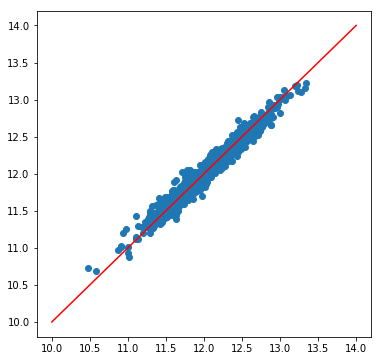

In [260]:
plt.figure(figsize=(6, 6))
plt.scatter(y, y_train_kr)
plt.plot(range(10, 15), range(10, 15), color="red")

### Create final prediction

In [261]:
y_submit = predictions_DF['Kernel Ridge']
#y_submit = predictions_DF['Meta Model']
#y_submit = ((0.0*predictions_DF['Elastic Net']) + (0.0*predictions_DF['Lasso']) + (0.0*predictions_DF['Kernel Ridge']) +(0.4*predictions_DF['XGBoost']) + (0.0*predictions_DF['LGBM'])+(0.6*predictions_DF['Meta Model']))

__Submit Predictions__

In [262]:
df_submit = pd.DataFrame({'Id':list(id_list),'SalePrice':np.expm1(y_submit)})

In [263]:
df_submit.head()

Id      SalePrice
0  1461  119818.676484
1  1462  160405.315593
2  1463  188880.744702
3  1464  200239.262485
4  1465  190431.449647

In [264]:
df_submit.to_csv('submission.csv',index=False)

With Kernel Ridge, a RMSE of 11.450% is obtained in Kaggle.